In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [129]:
df = pd.read_csv('DataCoSupplyChain.csv', encoding = 'unicode_escape')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [130]:
df.shape  # There are 180519 rows and 53 columns

(180519, 53)

In [131]:
df.info() # Datatypes of all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [132]:
df.describe() # Five point summary for all numerical variables

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


# Data Preprocessing and Cleaning

In [133]:
df['Customer Full Name'] = df['Customer Fname']+df['Customer Lname']
df.shape

(180519, 54)

In [134]:
df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
df.shape

(180519, 42)

In [135]:
round(df.isnull().sum()/len(df)*100,3)

Type                             0.000
Days for shipping (real)         0.000
Days for shipment (scheduled)    0.000
Benefit per order                0.000
Sales per customer               0.000
Delivery Status                  0.000
Late_delivery_risk               0.000
Category Id                      0.000
Category Name                    0.000
Customer City                    0.000
Customer Country                 0.000
Customer Id                      0.000
Customer Segment                 0.000
Customer State                   0.000
Customer Zipcode                 0.002
Department Id                    0.000
Department Name                  0.000
Market                           0.000
Order City                       0.000
Order Country                    0.000
Order Customer Id                0.000
order date (DateOrders)          0.000
Order Id                         0.000
Order Item Cardprod Id           0.000
Order Item Discount              0.000
Order Item Discount Rate 

In [136]:
df['Customer Zipcode']=df['Customer Zipcode'].fillna(0) # Only 2% were null values. Zipcodes can't be replaced with mean,median.

In [137]:
df['Customer Full Name'] = df['Customer Full Name'].fillna(' ') # Imputing null value

In [138]:
num_cols = list(df.select_dtypes(np.number).columns)
num_cols

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Customer Id',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price']

In [139]:
cat_cols = list(df.select_dtypes(np.object).columns)
cat_cols

['Type',
 'Delivery Status',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'Shipping Mode',
 'Customer Full Name']

In [140]:
print('No.of Numerical columns:',len(num_cols))
print('No.of Categorical columns:',len(cat_cols))

No.of Numerical columns: 24
No.of Categorical columns: 18


In [141]:
df['Order Status'].value_counts(normalize = True)*100   # Target column

COMPLETE           32.955534
PENDING_PAYMENT    22.065267
PROCESSING         12.132795
PENDING            11.204915
CLOSED             10.866446
ON_HOLD             5.431007
SUSPECTED_FRAUD     2.250179
CANCELED            2.045214
PAYMENT_REVIEW      1.048643
Name: Order Status, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


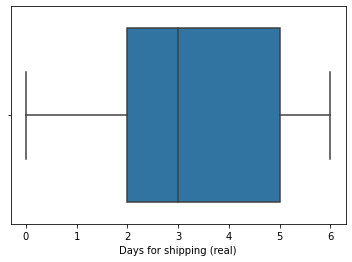

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


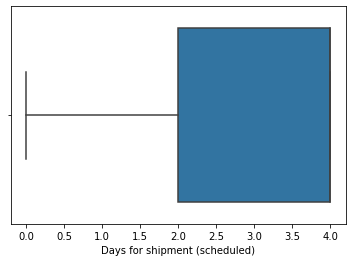

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


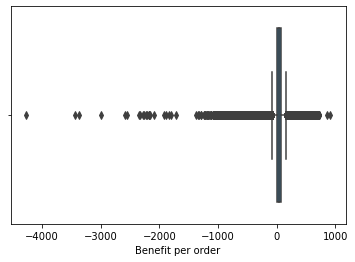

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


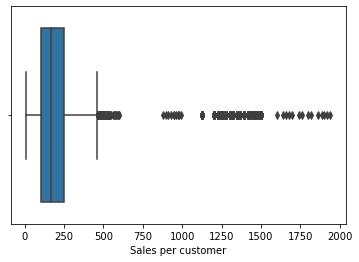

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


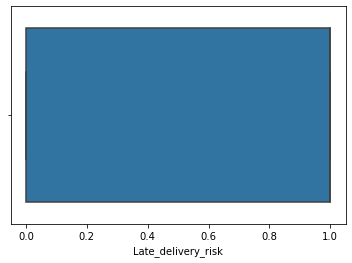

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


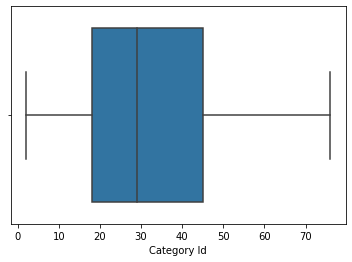

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


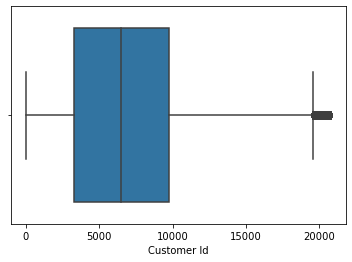

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


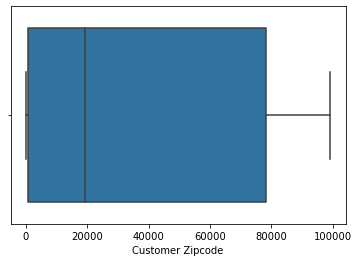

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


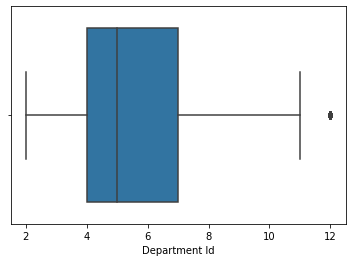

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


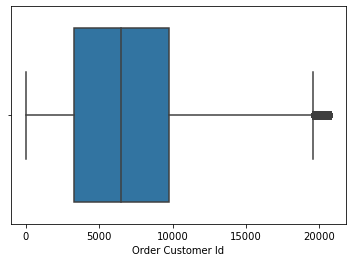

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


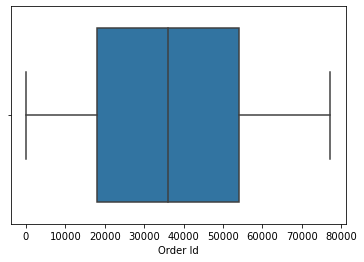

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


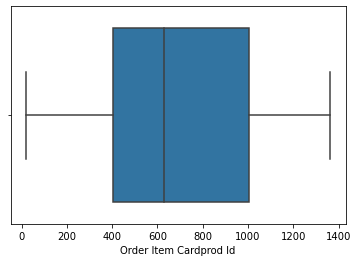

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


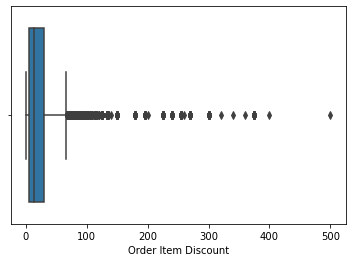

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


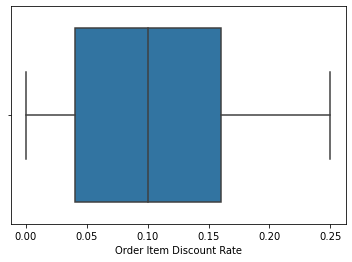

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


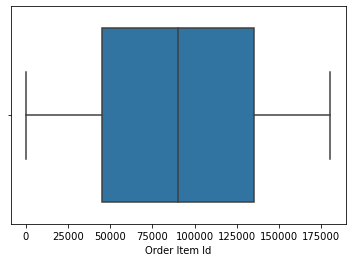

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


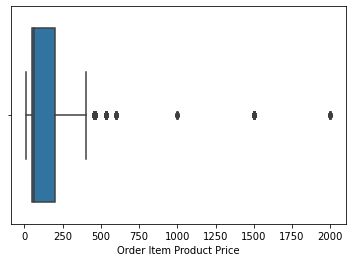

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


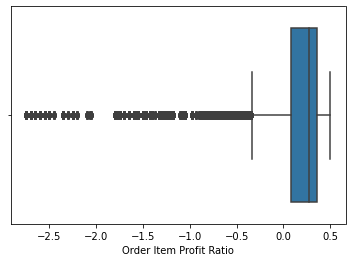

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


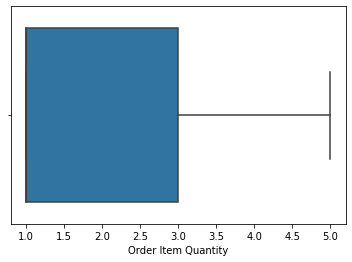

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


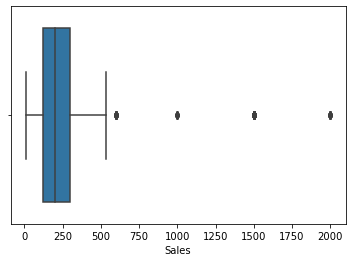

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


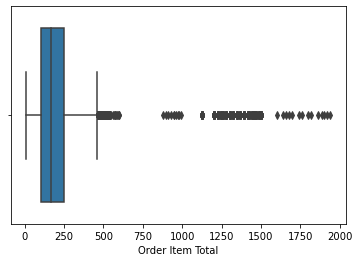

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


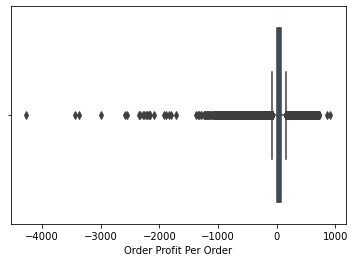

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


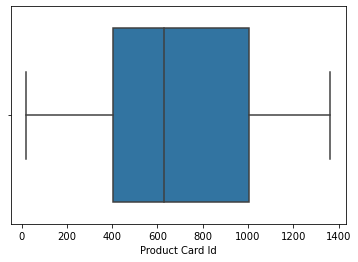

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


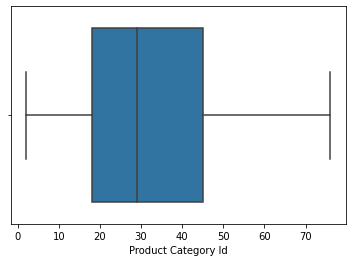

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


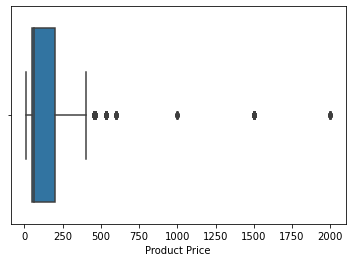

In [142]:
for i in num_cols:     # Outlier checks
    sns.boxplot(df[i])
    plt.show()

In [143]:
for i in num_cols:
    print('Skewness of column',i,':',df[i].skew())

Skewness of column Days for shipping (real) : 0.08477127299528447
Skewness of column Days for shipment (scheduled) : -0.7319982842174512
Skewness of column Benefit per order : -4.741834070263963
Skewness of column Sales per customer : 2.8884460570301864
Skewness of column Late_delivery_risk : -0.19407417010332956
Skewness of column Category Id : 0.36162479939405345
Skewness of column Customer Id : 0.4887682515125228
Skewness of column Customer Zipcode : 0.4909094319609744
Skewness of column Department Id : 0.27332062913380367
Skewness of column Order Customer Id : 0.4887682515125228
Skewness of column Order Id : 0.03270879463405791
Skewness of column Order Item Cardprod Id : 0.1382546099250616
Skewness of column Order Item Discount : 3.0397955138175647
Skewness of column Order Item Discount Rate : 0.34092760117630266
Skewness of column Order Item Id : 8.45546610224744e-18
Skewness of column Order Item Product Price : 3.191019570200194
Skewness of column Order Item Profit Ratio : -2.893

In [144]:
# Columns with skewness outside the range of -0.5 to +0.5
# Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Id
# Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Product Price.

In [145]:
print(np.log(df['Days for shipment (scheduled)'].skew()))
print(np.log(df['Benefit per order'].skew()))
print(np.log(df['Sales per customer'].skew()))
print(np.log(df['Order Item Discount'].skew()))
print(np.log(df['Order Item Id'].skew()))
print(np.log(df['Order Item Product Price'].skew()))
print(np.log(df['Order Item Profit Ratio'].skew()))
print(np.log(df['Sales'].skew()))
print(np.log(df['Order Item Total'].skew()))
print(np.log(df['Order Profit Per Order'].skew()))
print(np.log(df['Product Price'].skew()))

# Log transformation didn't work well.

nan
nan
1.0607186609843746
1.1117902479641353
-39.31171856565223
1.1603404802137445
nan
1.0592645710098108
1.0607186609843746
nan
1.1603404802137445


<ipython-input-145-2ee449a1a1be>:1: RuntimeWarning: invalid value encountered in log
  print(np.log(df['Days for shipment (scheduled)'].skew()))
<ipython-input-145-2ee449a1a1be>:2: RuntimeWarning: invalid value encountered in log
  print(np.log(df['Benefit per order'].skew()))
<ipython-input-145-2ee449a1a1be>:7: RuntimeWarning: invalid value encountered in log
  print(np.log(df['Order Item Profit Ratio'].skew()))
<ipython-input-145-2ee449a1a1be>:10: RuntimeWarning: invalid value encountered in log
  print(np.log(df['Order Profit Per Order'].skew()))


In [146]:
print(np.sqrt(df['Days for shipment (scheduled)'].skew()))
print(np.sqrt(df['Benefit per order'].skew()))
print(np.sqrt(df['Sales per customer'].skew()))
print(np.sqrt(df['Order Item Discount'].skew()))
print(np.sqrt(df['Order Item Id'].skew()))
print(np.sqrt(df['Order Item Product Price'].skew()))
print(np.sqrt(df['Order Item Profit Ratio'].skew()))
print(np.sqrt(df['Sales'].skew()))
print(np.sqrt(df['Order Item Total'].skew()))
print(np.sqrt(df['Order Profit Per Order'].skew()))
print(np.sqrt(df['Product Price'].skew()))

# Square root transformation too didn't work well.

<ipython-input-146-22eb3788458e>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(df['Days for shipment (scheduled)'].skew()))
<ipython-input-146-22eb3788458e>:2: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(df['Benefit per order'].skew()))
<ipython-input-146-22eb3788458e>:7: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(df['Order Item Profit Ratio'].skew()))


nan
nan
1.6995428964960508
1.743500935995609
2.907828416919994e-09
1.7863425120060805
nan
1.6983077014280838
1.6995428964960508
nan
1.7863425120060805


<ipython-input-146-22eb3788458e>:10: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(df['Order Profit Per Order'].skew()))


In [147]:
from sklearn.preprocessing import PowerTransformer

In [148]:
df_num = pd.DataFrame(df.select_dtypes(np.number))
df_num.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,20755,...,180517,327.75,0.29,1,327.75,314.640015,91.250000,1360,73,327.75
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,19492,...,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,1360,73,327.75
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,19491,...,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,1360,73,327.75
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,19490,...,179252,327.75,0.08,1,327.75,304.809998,22.860001,1360,73,327.75
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,19489,...,179251,327.75,0.45,1,327.75,298.250000,134.210007,1360,73,327.75


In [149]:
df_num.shape

(180519, 24)

In [150]:
df_cat = pd.DataFrame(df.select_dtypes(np.object))
df_cat.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Name,Shipping Mode,Customer Full Name
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,Smart watch,Standard Class,CallyHolloway
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,Smart watch,Standard Class,IreneLuna
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,Smart watch,Standard Class,GillianMaldonado
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,Smart watch,Standard Class,TanaTate
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,Smart watch,Standard Class,OrliHendricks


In [151]:
df_cat.shape

(180519, 18)

In [152]:
pt = PowerTransformer()
df_trans = pd.DataFrame(pt.fit_transform(df_num), columns = df_num.columns)
df_trans.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
0,-0.264030,0.802762,0.892824,1.158018,-1.101733,2.14966,2.571054,-1.175508,-2.447851,2.571054,...,1.553798,1.375277,0.231270,-0.87391,1.03936,1.158018,0.892824,1.753041,2.14966,1.375277
1,0.925996,0.802762,-1.875511,1.138346,0.907661,2.14966,2.389625,-1.175508,-2.447851,2.389625,...,1.535219,1.375277,-1.822335,-0.87391,1.03936,1.138346,-1.875511,1.753041,2.14966,1.375277
2,0.344422,0.802762,-1.869528,1.128455,-1.101733,2.14966,2.389480,1.169615,-2.447851,2.389480,...,1.535204,1.375277,-1.822335,-0.87391,1.03936,1.128455,-1.869528,1.753041,2.14966,1.375277
3,-0.264030,0.802762,-0.257417,1.098623,-1.101733,2.14966,2.389334,1.135182,-2.447851,2.389334,...,1.535189,1.375277,-0.640242,-0.87391,1.03936,1.098623,-0.257417,1.753041,2.14966,1.375277
4,-0.907992,0.802762,1.690495,1.058235,-1.101733,2.14966,2.389189,-1.175508,-2.447851,2.389189,...,1.535175,1.375277,1.216647,-0.87391,1.03936,1.058235,1.690495,1.753041,2.14966,1.375277


In [153]:
df_trans.skew()  # Skewness is in permisible limit

Days for shipping (real)        -0.073259
Days for shipment (scheduled)   -0.535865
Benefit per order                1.508880
Sales per customer               0.017112
Late_delivery_risk              -0.194074
Category Id                     -0.077407
Customer Id                     -0.169395
Customer Zipcode                -0.142980
Department Id                   -0.025031
Order Customer Id               -0.169395
Order Id                        -0.280818
Order Item Cardprod Id          -0.125583
Order Item Discount             -0.041690
Order Item Discount Rate         0.055382
Order Item Id                   -0.291490
Order Item Product Price         0.037677
Order Item Profit Ratio         -0.281849
Order Item Quantity              0.384059
Sales                            0.018768
Order Item Total                 0.017112
Order Profit Per Order           1.508880
Product Card Id                 -0.125583
Product Category Id             -0.077407
Product Price                    0

In [154]:
df_trans = df_trans.drop('Order Profit Per Order', axis = 1)
# As we can see Benefit per order & Order profit per order are same columns only with same value of skewness.

In [155]:
for i in cat_cols:
    print('% of each categories in column',i,':')
    print(df[i].value_counts(normalize = True)*100)

% of each categories in column Type :
DEBIT       38.386541
TRANSFER    27.633102
PAYMENT     23.113910
CASH        10.866446
Name: Type, dtype: float64
% of each categories in column Delivery Status :
Late delivery        54.829132
Advance shipping     23.040234
Shipping on time     17.835242
Shipping canceled     4.295393
Name: Delivery Status, dtype: float64
% of each categories in column Category Name :
Cleats                  13.600230
Men's Footwear          12.323357
Women's Apparel         11.652513
Indoor/Outdoor Games    10.690287
Fishing                  9.597328
Water Sports             8.608512
Camping & Hiking         7.605294
Cardio Equipment         6.917277
Shop By Sport            6.084678
Electronics              1.748292
Accessories              0.986046
Golf Balls               0.817089
Girls' Apparel           0.665304
Golf Gloves              0.592735
Trade-In                 0.539555
Video Games              0.464217
Children's Clothing      0.361181
Women's Clo

In [156]:
for i in cat_cols:
    print('No.of unique categories in column',i,':')
    print(df[i].nunique())

No.of unique categories in column Type :
4
No.of unique categories in column Delivery Status :
4
No.of unique categories in column Category Name :
50
No.of unique categories in column Customer City :
563
No.of unique categories in column Customer Country :
2
No.of unique categories in column Customer Segment :
3
No.of unique categories in column Customer State :
46
No.of unique categories in column Department Name :
11
No.of unique categories in column Market :
5
No.of unique categories in column Order City :
3597
No.of unique categories in column Order Country :
164
No.of unique categories in column order date (DateOrders) :
65752
No.of unique categories in column Order Region :
23
No.of unique categories in column Order State :
1089
No.of unique categories in column Order Status :
9
No.of unique categories in column Product Name :
118
No.of unique categories in column Shipping Mode :
4
No.of unique categories in column Customer Full Name :
14026


In [157]:
# Here, Customer Full Name, Order city, Order State, Customer City, order date are some columns having exceptionally higher 
# number of unique categories which may create problem later on. So, need to drop them

In [158]:
df = df.drop(['Customer Full Name','Order City','Order State','Customer City','order date (DateOrders)'],axis=1, inplace = True)

In [159]:
cat_cols.remove('Customer Full Name')
cat_cols.remove('Order City')
cat_cols.remove('Order State')
cat_cols.remove('Customer City')
cat_cols.remove('order date (DateOrders)')

In [160]:
cat_cols

['Type',
 'Delivery Status',
 'Category Name',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order Country',
 'Order Region',
 'Order Status',
 'Product Name',
 'Shipping Mode']

In [161]:
df_cat.shape

(180519, 18)

In [162]:
df_cat = df_cat.drop(['Customer Full Name','Order City','Order State','Customer City','order date (DateOrders)'], axis = 1)

In [163]:
df_new = pd.concat([df_cat, df_trans], axis = 1)
df_new.head()

,Type,Delivery Status,Category Name,Customer Country,Customer Segment,Customer State,Department Name,Market,Order Country,Order Region,...,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Card Id,Product Category Id,Product Price
0,DEBIT,Advance shipping,Sporting Goods,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Indonesia,Southeast Asia,...,-0.870368,1.553798,1.375277,0.231270,-0.87391,1.03936,1.158018,1.753041,2.14966,1.375277
1,TRANSFER,Late delivery,Sporting Goods,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,India,South Asia,...,-0.699316,1.535219,1.375277,-1.822335,-0.87391,1.03936,1.138346,1.753041,2.14966,1.375277
2,CASH,Shipping on time,Sporting Goods,EE. UU.,Consumer,CA,Fitness,Pacific Asia,India,South Asia,...,-0.533545,1.535204,1.375277,-1.822335,-0.87391,1.03936,1.128455,1.753041,2.14966,1.375277
3,DEBIT,Advance shipping,Sporting Goods,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Australia,Oceania,...,-0.372845,1.535189,1.375277,-0.640242,-0.87391,1.03936,1.098623,1.753041,2.14966,1.375277
4,PAYMENT,Advance shipping,Sporting Goods,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Australia,Oceania,...,-0.065867,1.535175,1.375277,1.216647,-0.87391,1.03936,1.058235,1.753041,2.14966,1.375277


In [164]:
df_new['fraud'] = np.where(df_new['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)  # Now, fraud becomes the target column.
# Converted it to binary classification.

In [165]:
df_new = df_new.drop('Order Status', axis = 1)

In [166]:
df_new.shape

(180519, 36)

In [170]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Delivery Status                180519 non-null  object 
 2   Category Name                  180519 non-null  object 
 3   Customer Country               180519 non-null  object 
 4   Customer Segment               180519 non-null  object 
 5   Customer State                 180519 non-null  object 
 6   Department Name                180519 non-null  object 
 7   Market                         180519 non-null  object 
 8   Order Country                  180519 non-null  object 
 9   Order Region                   180519 non-null  object 
 10  Product Name                   180519 non-null  object 
 11  Shipping Mode                  180519 non-null  object 
 12  Days for shipping (real)      

In [167]:
cat_cols_new = list(df_new.select_dtypes(include = np.object).columns)
cat_cols_new

['Type',
 'Delivery Status',
 'Category Name',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order Country',
 'Order Region',
 'Product Name',
 'Shipping Mode']

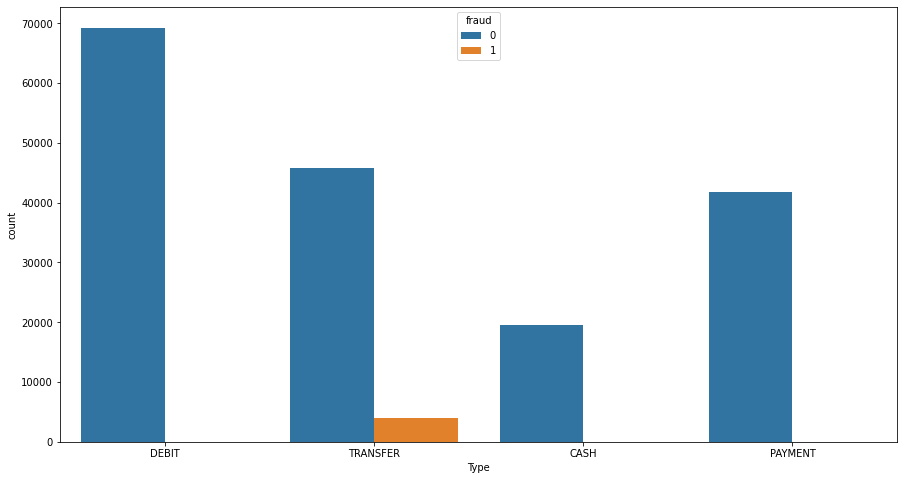

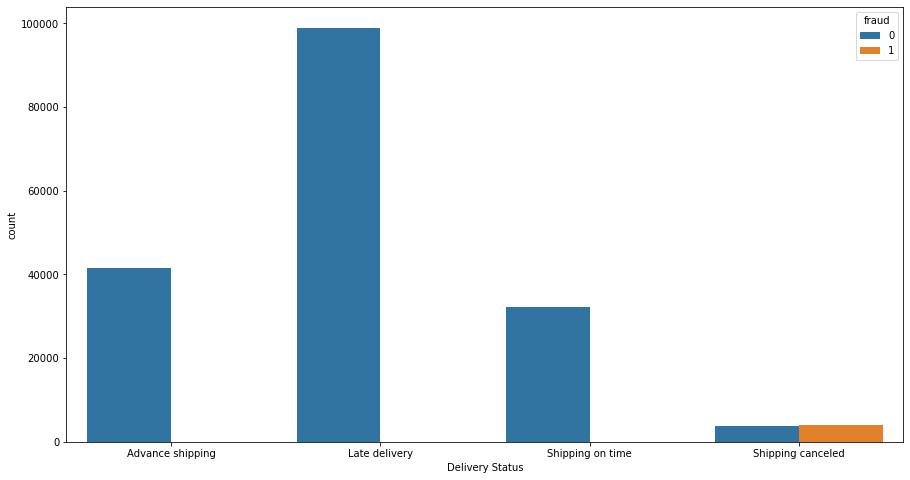

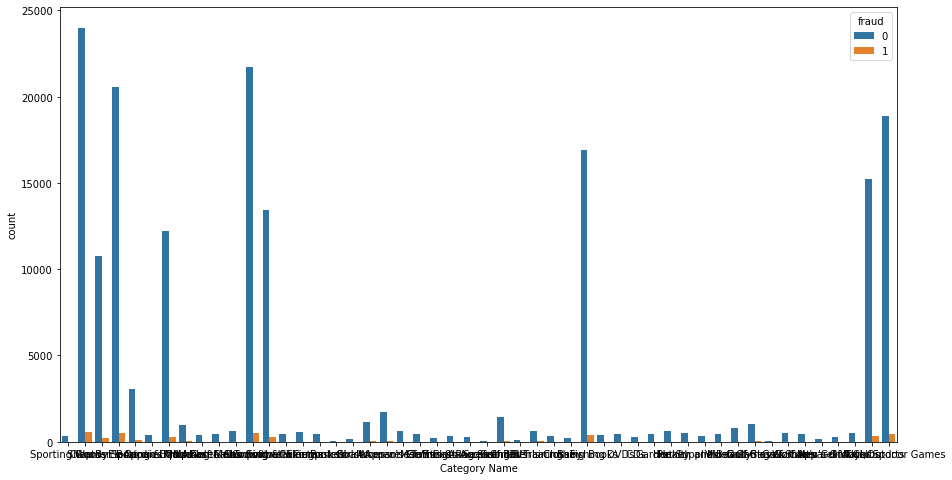

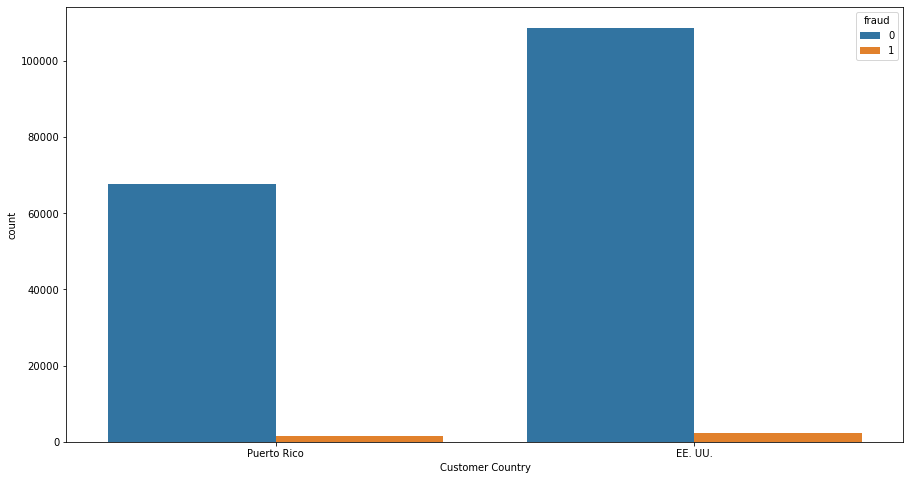

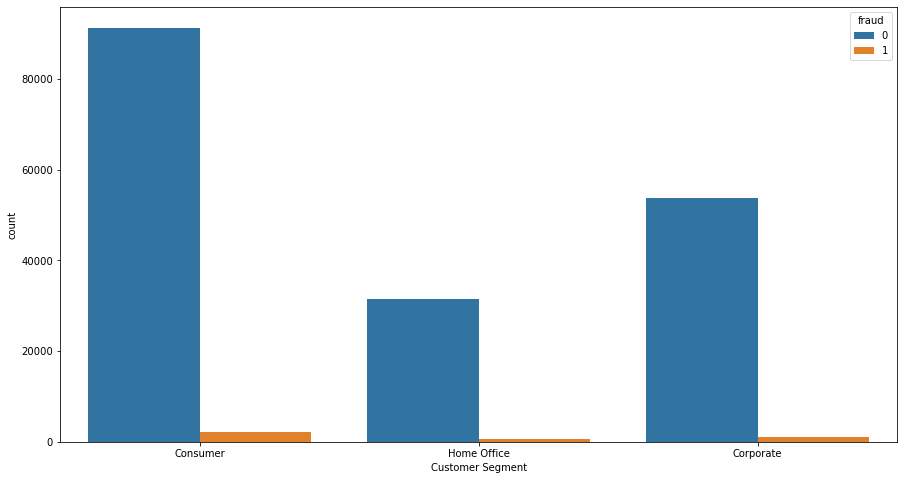

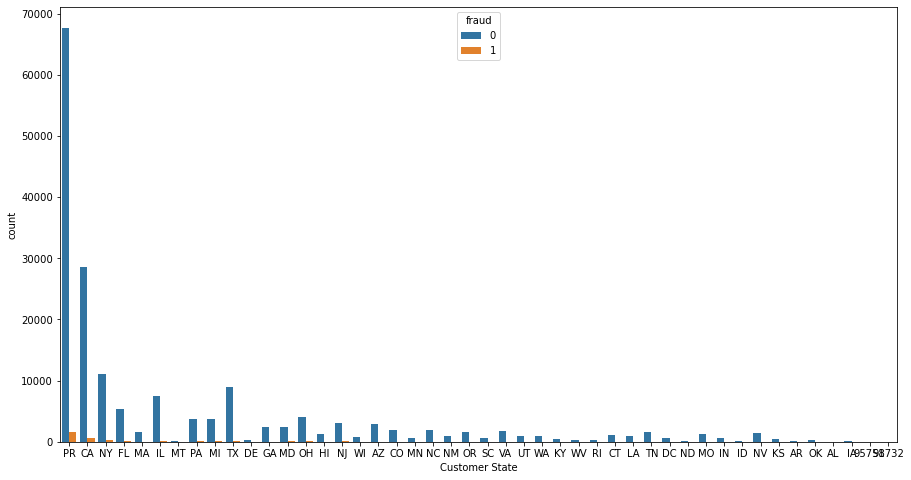

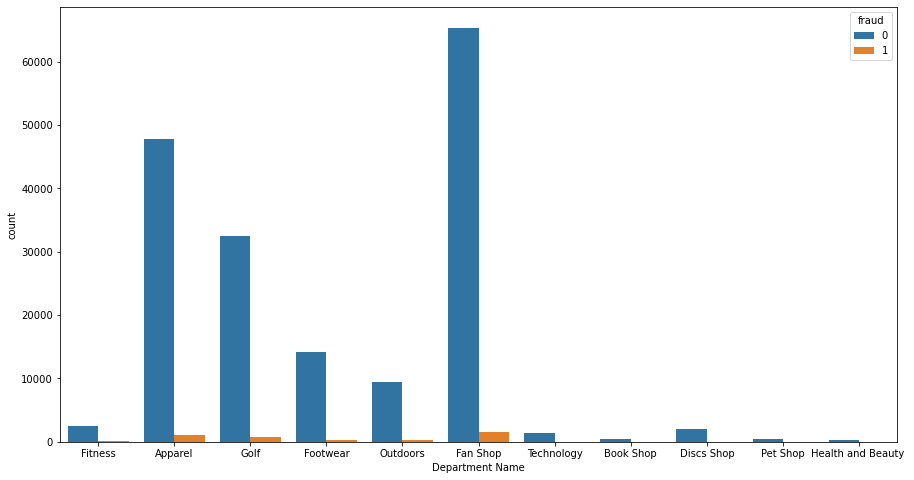

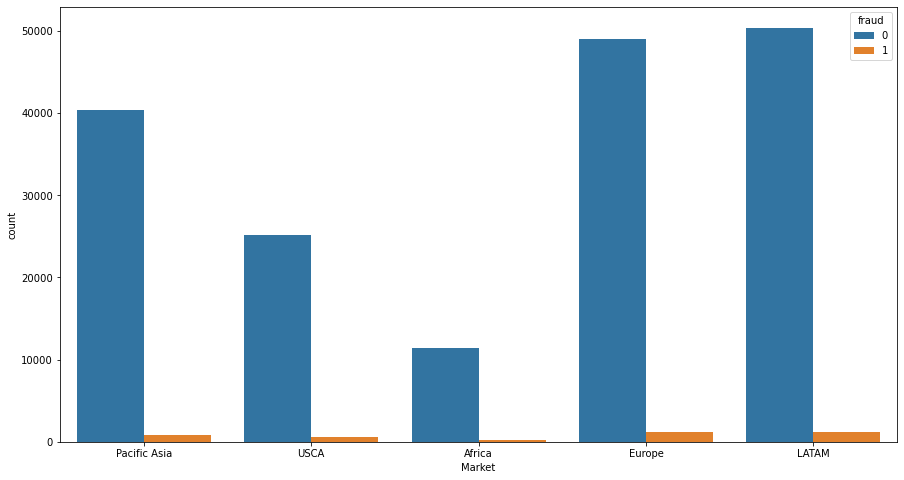

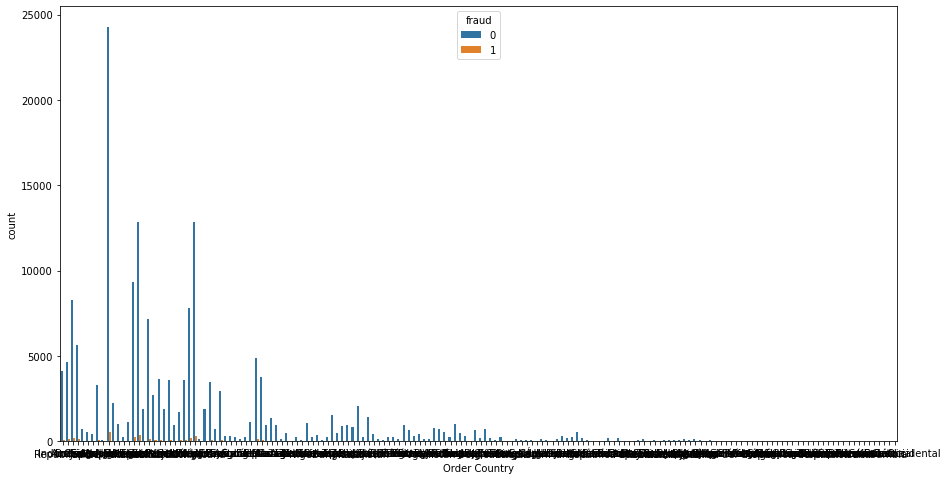

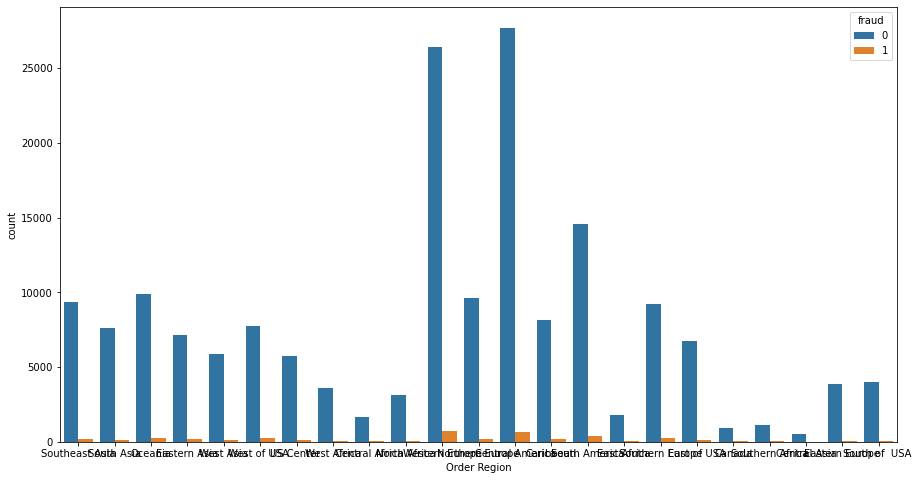

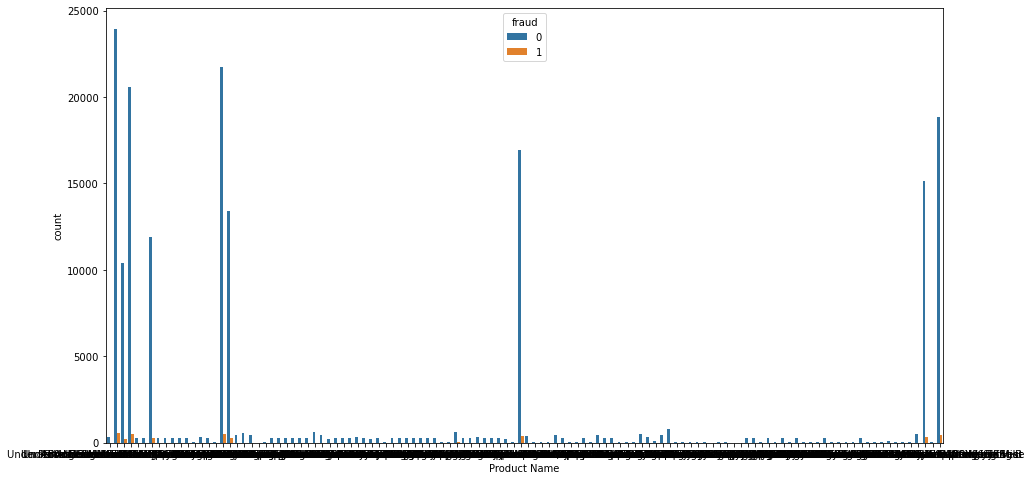

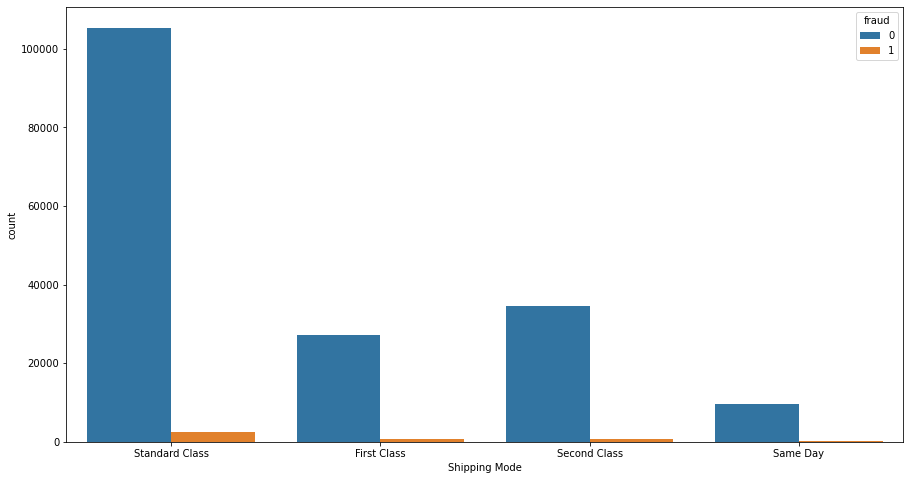

In [171]:
plt.rcParams['figure.figsize'] = [15,8]   # Raltionship of categorical columns with target.
for i in cat_cols_new:
    sns.countplot(x = df_new[i], hue = df_new['fraud']) # hue is the target here
    plt.show()

In [ ]:
# Dropping of the column will be decided after statistical analysis.
# Generally the idea is to drop the column showing same proportions with target.

In [172]:
num_cols_new = list(df_new.select_dtypes(include = np.number).columns)
num_cols_new

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Customer Id',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Product Card Id',
 'Product Category Id',
 'Product Price',
 'fraud']

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


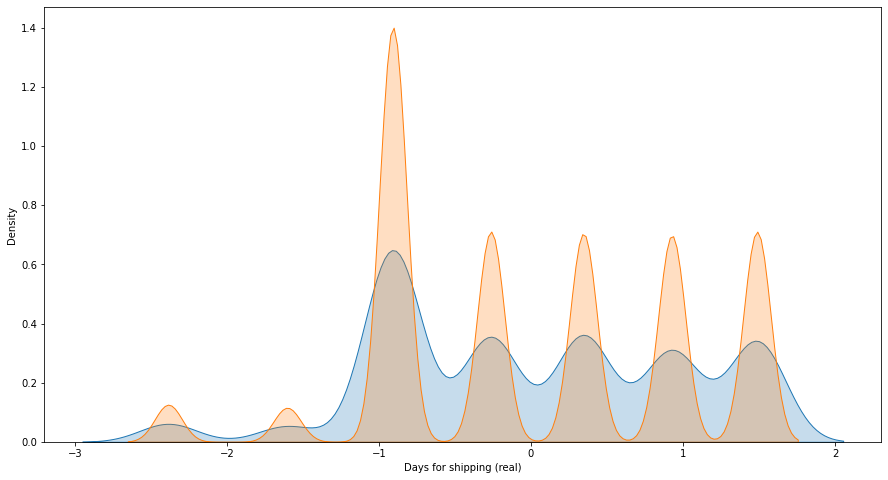

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


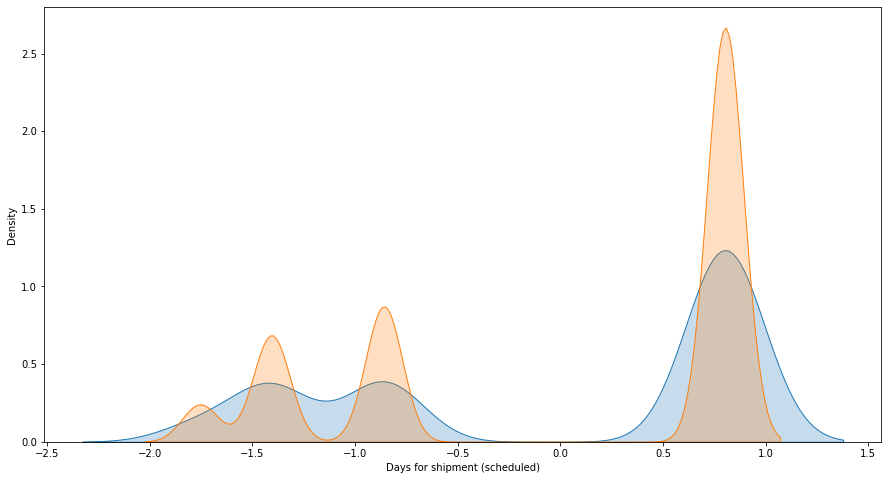

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


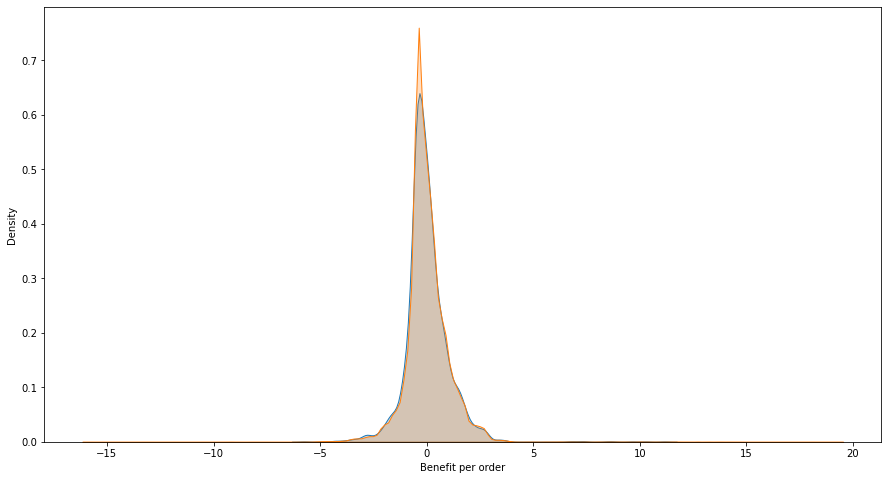

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


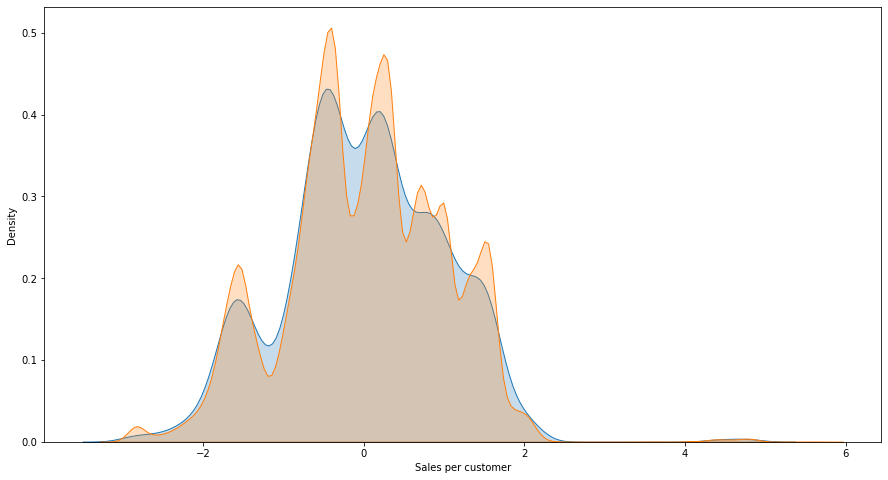

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


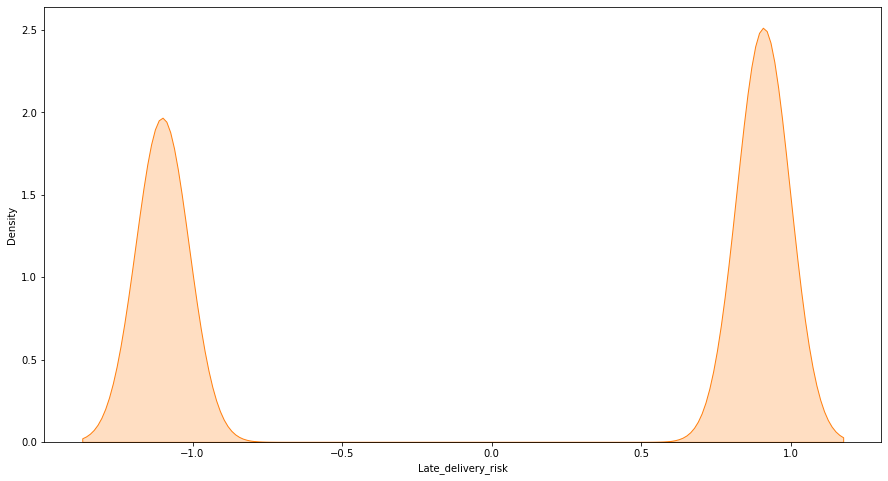

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


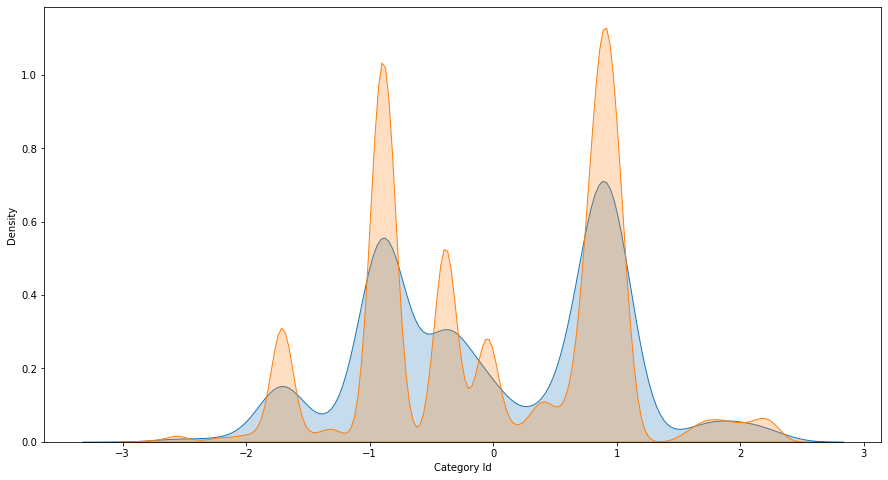

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


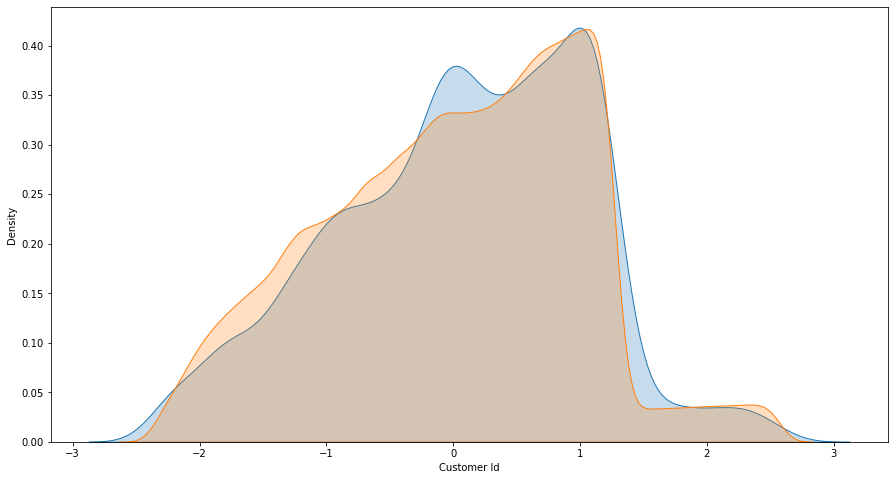

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


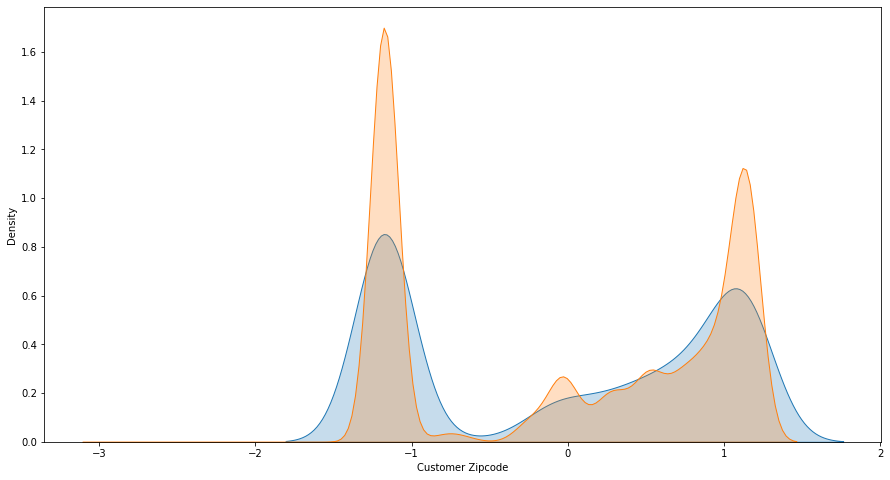

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


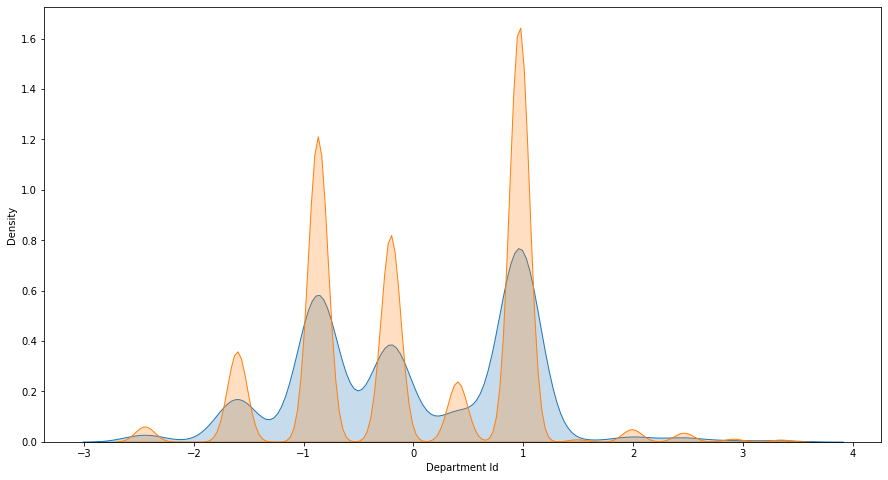

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


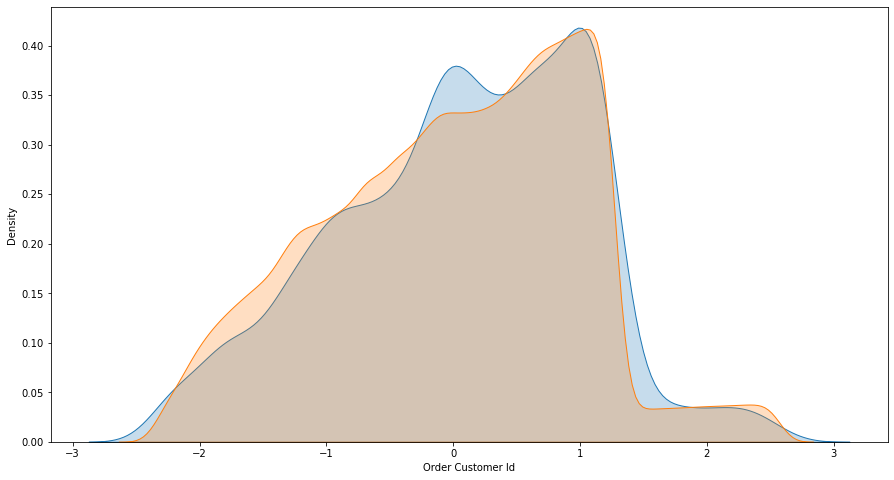

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


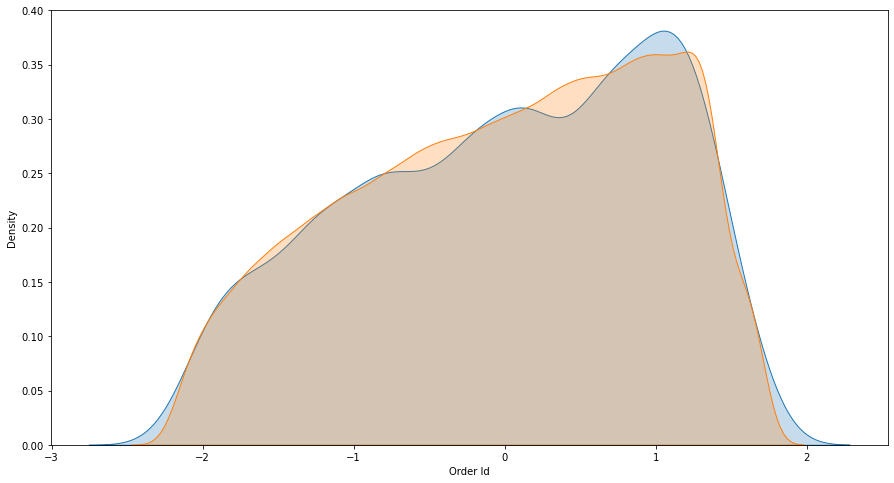

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


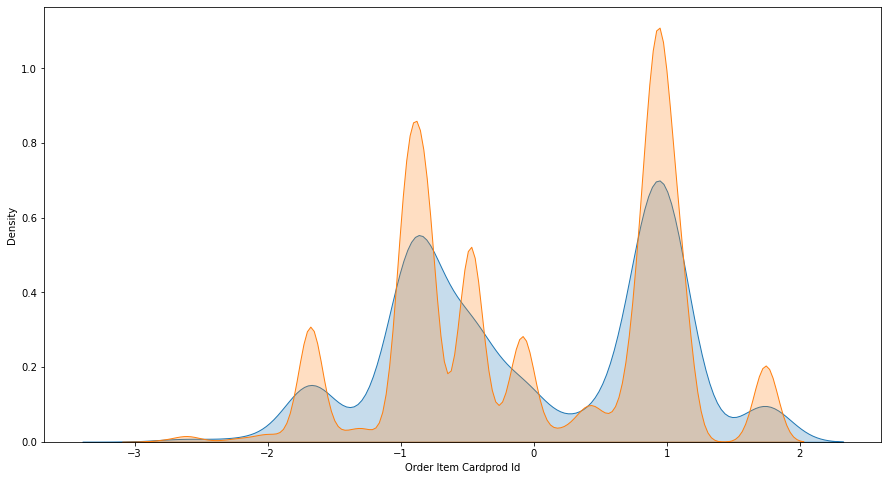

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


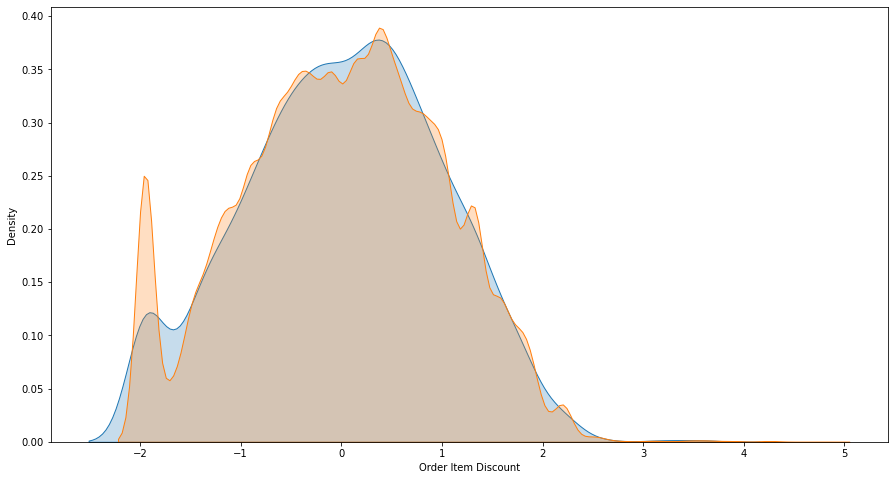

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


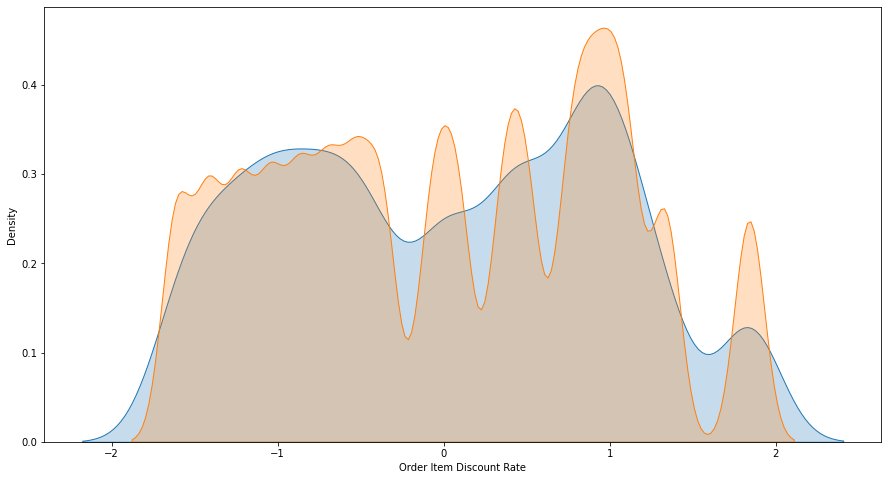

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


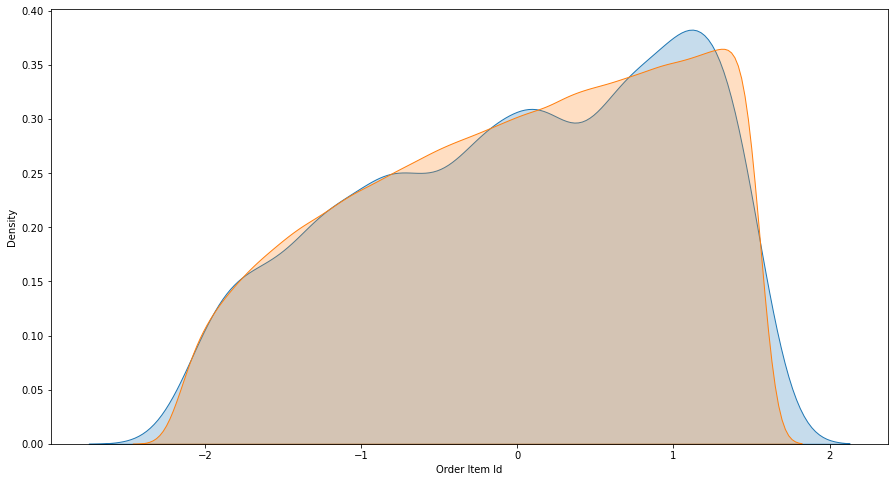

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


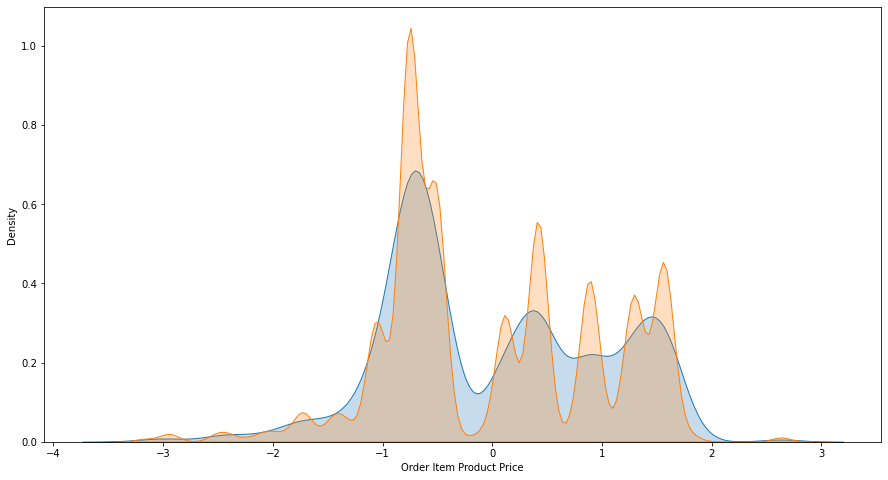

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


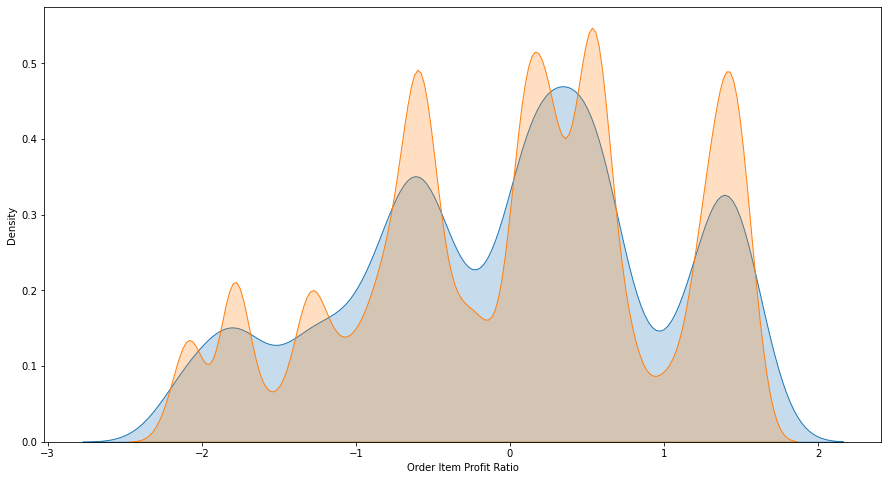

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


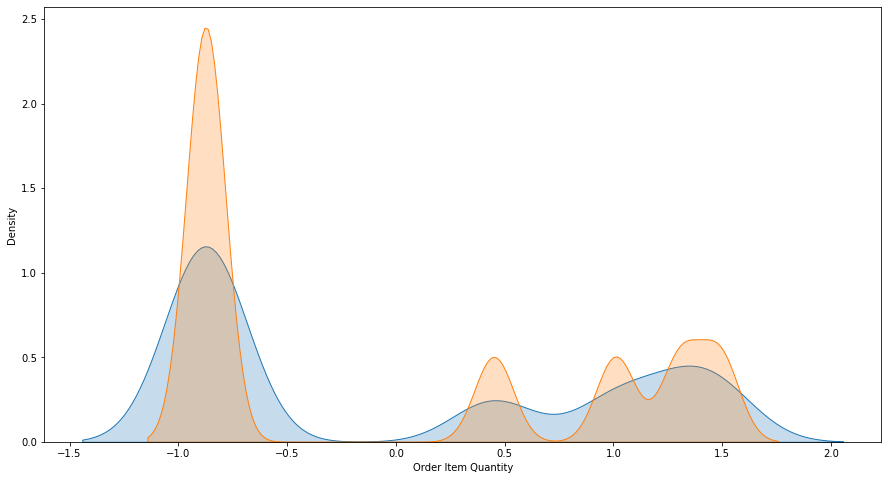

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


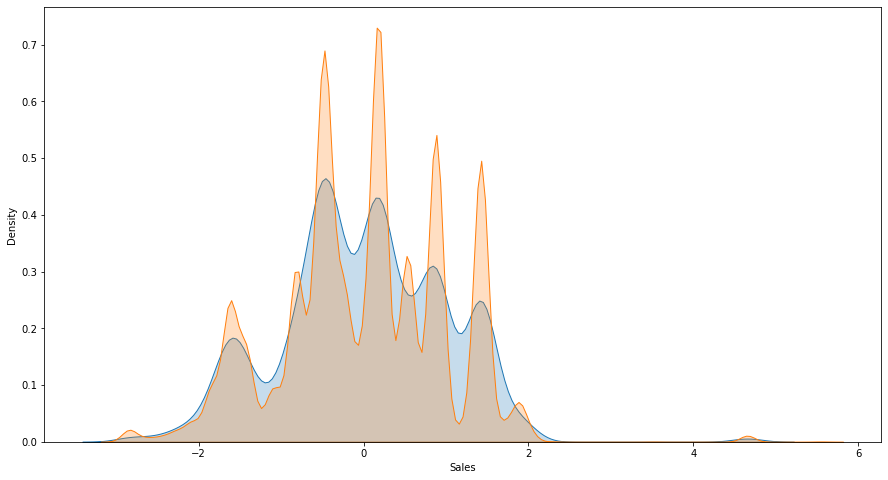

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


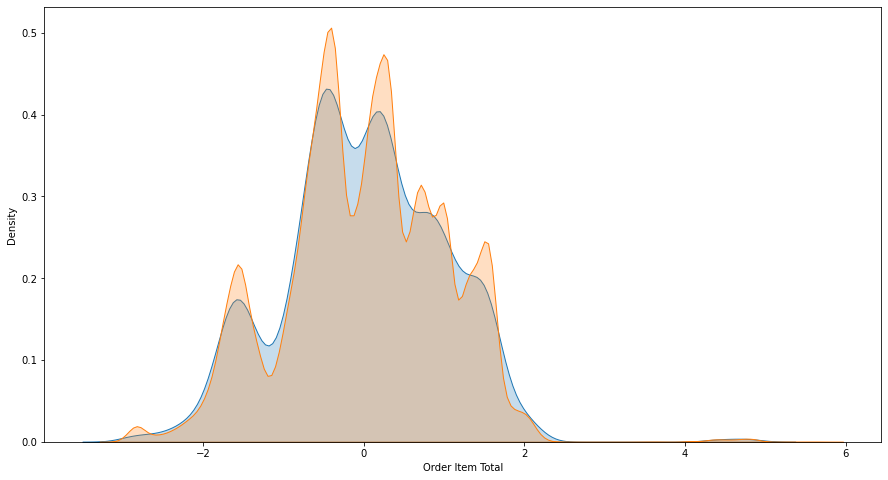

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


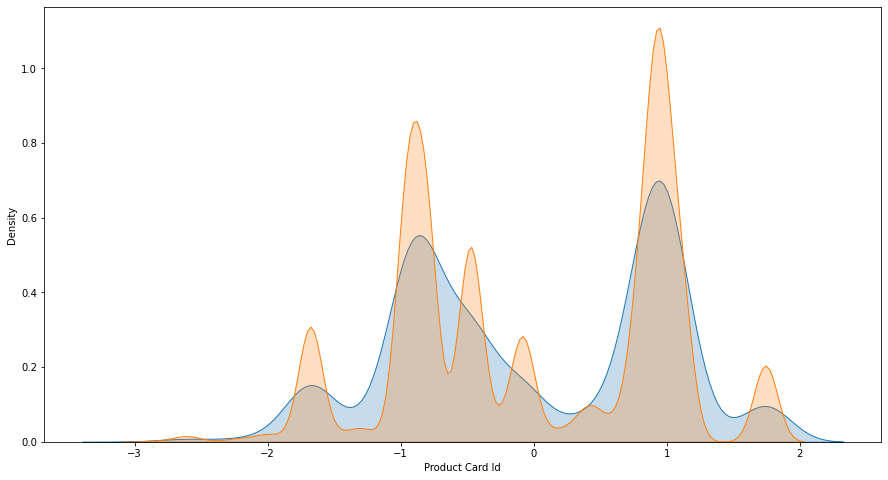

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


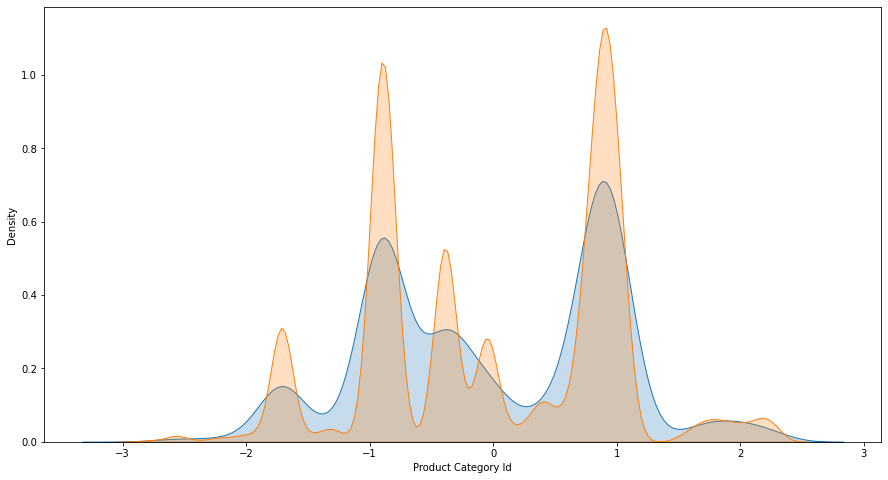

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


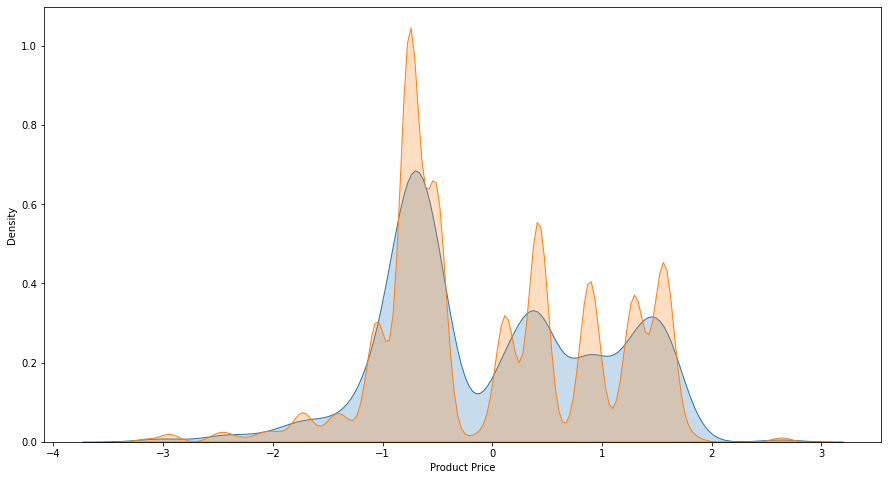

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(

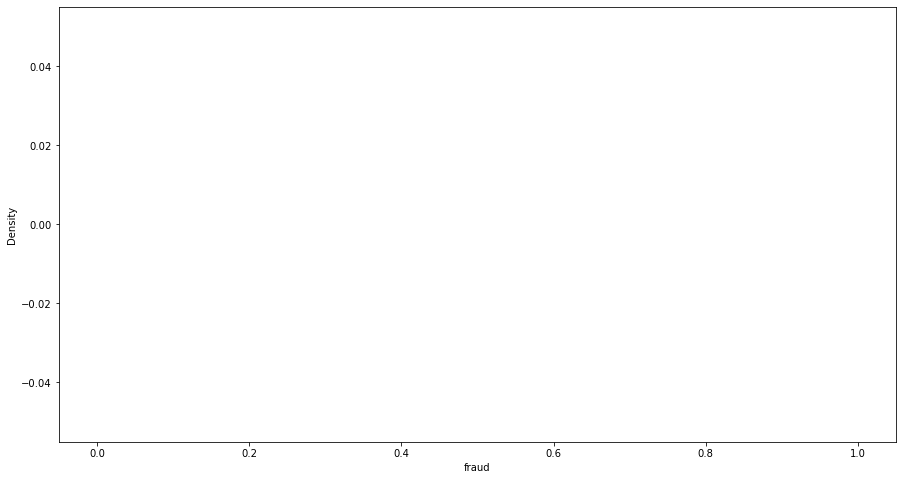

In [173]:
for i in num_cols_new:
    sns.distplot(df_new[df_new['fraud']==1][i],kde_kws={'shade':True},hist=False)
    sns.distplot(df_new[df_new['fraud']==0][i],kde_kws={'shade':True},hist=False)
    plt.show()

In [ ]:
# Here, the features should be able to put distinct distribution w.r.t target.
# Other features can be dropped.
# Significance of rest of the features can be tested statistically.
# Dropping to be done after statistical test.

In [174]:
from scipy import stats

In [176]:
for i in cat_cols_new:                         # Statistical significance test for categorical columns
    ct=pd.crosstab(df_new[i],df_new['fraud'])
    print('p value for column:',i,':',stats.chi2_contingency(ct)[1])

p value for column: Type : 0.0
p value for column: Delivery Status : 0.0
p value for column: Category Name : 0.722756766656929
p value for column: Customer Country : 0.0043149927839307295
p value for column: Customer Segment : 0.0006840787359301104
p value for column: Customer State : 8.582620498747587e-11
p value for column: Department Name : 0.9687137361897139
p value for column: Market : 0.062336109666202545
p value for column: Order Country : 2.1962143921929054e-36
p value for column: Order Region : 5.097832591336198e-09
p value for column: Product Name : 0.8136553665199319
p value for column: Shipping Mode : 0.03737290804174167


In [177]:
# p- value for Customer State, Order Country and Order Region are standing out
# Out of this, Customer State and Order Region is not that important for fraud analysis.
# So, can be dropped.

In [178]:
df_new = df_new.drop(['Customer State', 'Order Region'], axis = 1)

In [179]:
cat_cols_new.remove('Customer State')
cat_cols_new.remove('Order Region')

In [180]:
for i in num_cols_new:
    print('p value for column:',i,':',stats.ttest_ind(df_new[df_new['fraud']==1][i],df_new[df_new['fraud']==0][i])[1])

p value for column: Days for shipping (real) : 0.9090682923980073
p value for column: Days for shipment (scheduled) : 0.3373536759682638
p value for column: Benefit per order : 0.587595864532177
p value for column: Sales per customer : 0.8237124946523663
p value for column: Late_delivery_risk : 0.0
p value for column: Category Id : 0.5870966632082585
p value for column: Customer Id : 1.6410961537178465e-05
p value for column: Customer Zipcode : 0.007671356634543081
p value for column: Department Id : 0.52058769943868
p value for column: Order Customer Id : 1.6410961537178465e-05
p value for column: Order Id : 0.4175699938092684
p value for column: Order Item Cardprod Id : 0.6148094739002248
p value for column: Order Item Discount : 0.19810654406969888
p value for column: Order Item Discount Rate : 0.2674075228994531
p value for column: Order Item Id : 0.4027327827985443
p value for column: Order Item Product Price : 0.8094386788965418
p value for column: Order Item Profit Ratio : 0.177

In [ ]:
# Here, p-value for Customer Id and Order Customer Id stands out
# Out of these, we can remove Order Customer Id as it is not that important and it is showing resemblance with Customer Id
# So, dropping it.

In [181]:
df_new = df_new.drop('Order Customer Id', axis = 1)

In [182]:
num_cols_new.remove('Order Customer Id')

# Modelling

In [183]:
# Here, since more number categories in categorical features, going for get_dummies is not feasible which will unnecessarily
# increase the dimension of the dataframe. So, LabelEncoding would be a good option. 

In [184]:
from sklearn.preprocessing import LabelEncoder

In [185]:
le = LabelEncoder()

In [186]:
cat_cols_new

['Type',
 'Delivery Status',
 'Category Name',
 'Customer Country',
 'Customer Segment',
 'Department Name',
 'Market',
 'Order Country',
 'Product Name',
 'Shipping Mode']

In [187]:
df_new['Type']  = le.fit_transform(df_new['Type'])
df_new['Delivery Status']  = le.fit_transform(df_new['Delivery Status'])
df_new['Category Name']  = le.fit_transform(df_new['Category Name'])
df_new['Customer Country']  = le.fit_transform(df_new['Customer Country'])
df_new['Customer Segment']  = le.fit_transform(df_new['Customer Segment'])
df_new['Department Name']  = le.fit_transform(df_new['Department Name'])
df_new['Market']  = le.fit_transform(df_new['Market'])
df_new['Order Country']  = le.fit_transform(df_new['Order Country'])
df_new['Product Name']  = le.fit_transform(df_new['Product Name'])
df_new['Shipping Mode']  = le.fit_transform(df_new['Shipping Mode'])

In [188]:
df_new.shape

(180519, 33)

In [216]:
X = df_new.drop('fraud', axis = 1)
y = df_new['fraud']

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =48) # Train:Test = 70:30

In [192]:
# Ascertaing through statistical test that train & test data represent the overall data

# Ho: train and test set are reprentative of the overall data.
# Ha: train and test set are not reprentative of the overall data.

In [193]:
stats.ttest_ind(y_train,y_test)

Ttest_indResult(statistic=0.29805652643437114, pvalue=0.7656603642388126)

In [194]:
# Since p-value > 0.05, Accepting Ho.

In [195]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

126363
54156
126363
54156


# Base Model

In [196]:
import statsmodels.api as sm

In [197]:
Xc=sm.add_constant(X_train)
model=sm.Logit(y_train,Xc).fit()
model.summary()

         Current function value: 0.052571
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  fraud   No. Observations:               126363
Model:                          Logit   Df Residuals:                   126334
Method:                           MLE   Df Model:                           28
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                  0.5127
Time:                        11:15:53   Log-Likelihood:                -6643.1
converged:                      False   LL-Null:                       -13632.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -115.5764        nan        nan        nan         nan         nan
Type                             35.2035        nan        nan        nan         nan         nan
Delivery Status                   0.0757      0.023      3.283      0.001       0.030       0.121
Category Name                    -0.0011      0.002     -0.573      0.567      -0.005       0.003
Customer Country                  0.2029      0.125      1.623      0.105      -0.042       0.448
Customer Segment                 -0.0685      0.030     -2.321      0.020      -0.126      -0.011
Department Name                   0.0110      0.011      1.021      0.307      -0.010       0.032
Market                           -0.0130      0.020     -0.634      0.526      -0.053       0.027
Order Country                    -0.0004      0.001     -0.820      0.412      -0.002       0.001
Product Name                     -0.0007      0.001     -0.542      0.588      -0.003       0.002
Shipping Mode                    -0.9670      0.057    -16.859      0.000      -1.079      -0.855
Days for shipping (real)          1.1359      0.032     35.443      0.000       1.073       1.199
Days for shipment (scheduled)    -0.1246      0.064     -1.949      0.051      -0.250       0.001
Benefit per order                 0.0515      0.042      1.220      0.223      -0.031       0.134
Sales per customer               -0.5726   1.79e+07   -3.2e-08      1.000   -3.51e+07    3.51e+07
Late_delivery_risk               -9.8702     85.999     -0.115      0.909    -178.426     158.685
Category Id                       0.0355        nan        nan        nan         nan         nan
Customer Id                       0.0513      0.025      2.075      0.038       0.003       0.100
Customer Zipcode                  0.0407      0.061      0.668      0.504      -0.079       0.160
Department Id                    -0.0679      0.063     -1.070      0.285      -0.192       0.056
Order Id                         -1.9677      1.664     -1.183      0.237      -5.228       1.293
Order Item Cardprod Id           -0.0104      0.410     -0.025      0.980      -0.814       0.793
Order Item Discount               0.0177      0.082      0.215      0.830      -0.144       0.179
Order Item Discount Rate         -0.1253      0.110     -1.137      0.255      -0.341       0.091
Order Item Id                     1.9495      1.657      1.176      0.239      -1.298       5.198
Order Item Product Price          0.1095        nan        nan        nan         nan         nan
Order Item Profit Ratio          -0.0672      0.037     -1.805      0.071      -0.140       0.006
Order Item Quantity               0.1393      0.098      1.421      0.155      -0.053       0.331
Sales                             0.9260      0.779      1.189      0.235      -0.601       2.453
Order Item Total                 -0.5726   1.79e+07   -3.2e-08      1.000   -3.51e+07    3.51e+07
Product

In [ ]:
# From above Logit model summary table column P>|z|, we can find insignificant variables whose p-value > 0.5

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [201]:
model = LogisticRegression(random_state=48).fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     52946
           1       0.52      0.28      0.36      1210

    accuracy                           0.98     54156
   macro avg       0.75      0.63      0.67     54156
weighted avg       0.97      0.98      0.97     54156

[[52638   308]
 [  877   333]]


In [ ]:
# precision    recall  f1-score   
#   0.98      0.99      0.99     
#   0.52      0.28      0.36      
# For class 1, metrics are quite low which has to be improved
# Overall Accuracy = 0.98 i.e 98%

In [203]:
df_new['fraud'].value_counts(normalize = True)*100

0    97.749821
1     2.250179
Name: fraud, dtype: float64

In [ ]:
# Target is way too imbalanced. So, resampling techniques like SMOTE has to be used.

In [204]:
lr=LogisticRegression()
lr.fit(Xc.iloc[:,1:],y_train)
y_train_pred=lr.predict(Xc.iloc[:,1:])

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
from sklearn.metrics import cohen_kappa_score

In [206]:
# Cohen suggested the Kappa result be interpreted as follows: values ≤ 0 as indicating no agreement 
# 0.01–0.20 as none to slight, 0.21–0.40 as fair,
# 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

In [207]:
cohen_kappa_score(y_train,y_train_pred) # Model is in fair agreement. There is possibliblity of improvement.

0.347390674473511

# Decision Tree

In [213]:
model1 = DecisionTreeClassifier(random_state=48).fit(X_train,y_train)
pred1 = model1.predict(X_test)
print(classification_report(y_test, pred1))
print(confusion_matrix(y_test, pred1))

# Here, Performance improved.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52946
           1       0.67      0.67      0.67      1210

    accuracy                           0.99     54156
   macro avg       0.83      0.83      0.83     54156
weighted avg       0.99      0.99      0.99     54156

[[52539   407]
 [  395   815]]


# Random Forest

In [214]:
model2 = RandomForestClassifier(random_state=48).fit(X_train,y_train) 
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))
print(confusion_matrix(y_test, pred2))

# Similar result to Decision Tree. Precision for Class 1 improved more.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52946
           1       0.73      0.63      0.68      1210

    accuracy                           0.99     54156
   macro avg       0.86      0.81      0.84     54156
weighted avg       0.99      0.99      0.99     54156

[[52657   289]
 [  443   767]]


# AdaBoost

In [210]:
from sklearn.ensemble import AdaBoostClassifier

In [212]:
ada_model = AdaBoostClassifier(base_estimator = model, random_state=48)
ada_model.fit(X_train, y_train)
print(ada_model.score(X_test, y_test))

# Quite a good score. 

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.9776571386365315


# SMOTE Analysis and implementing on several algorithms

In [215]:
from imblearn.over_sampling import SMOTE

In [217]:
sm = SMOTE()

In [218]:
X_bal, y_bal = sm.fit_resample(X,y)
X_bal.shape, y_bal.shape

((352914, 32), (352914,))

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.3, random_state=48)

In [220]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
pred3 = lr1.predict(X_test)
print('Accuracy:',accuracy_score(y_test, pred3))
print(classification_report(y_test, pred3))
print(confusion_matrix(y_test, pred3))

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9416953955135773
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     52866
           1       0.92      0.97      0.94     53009

    accuracy                           0.94    105875
   macro avg       0.94      0.94      0.94    105875
weighted avg       0.94      0.94      0.94    105875

[[48387  4479]
 [ 1694 51315]]


In [ ]:
# After SMOTE, in base model overall accuarcy decreased but metrics for Class 1 improved.

In [222]:
model1_new = DecisionTreeClassifier(random_state=48).fit(X_train,y_train)
pred1_new = model1_new.predict(X_test)
print(classification_report(y_test, pred1_new))
print(confusion_matrix(y_test, pred1_new))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52866
           1       0.99      0.99      0.99     53009

    accuracy                           0.99    105875
   macro avg       0.99      0.99      0.99    105875
weighted avg       0.99      0.99      0.99    105875

[[52305   561]
 [  402 52607]]


In [ ]:
# Way better result after SMOTE. Improvement in Class1 metrics. Overall Accuracy remains same.

In [224]:
model2_new = RandomForestClassifier(random_state=48).fit(X_train,y_train) 
pred2_new = model2_new.predict(X_test)
print(classification_report(y_test, pred2_new))
print(confusion_matrix(y_test, pred2_new))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52866
           1       0.99      1.00      0.99     53009

    accuracy                           0.99    105875
   macro avg       0.99      0.99      0.99    105875
weighted avg       0.99      0.99      0.99    105875

[[52079   787]
 [   48 52961]]


In [ ]:
# Way better result after SMOTE. Improvement in Class1 metrics. Overall Accuracy remains same.
# Specially Precision for class 0 and recall for class 1 has shown promising improvement.

In [225]:
ada_model1 = AdaBoostClassifier(base_estimator = lr1, random_state=48)
ada_model1.fit(X_train, y_train)
print(ada_model1.score(X_test, y_test))

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9561936245572609


In [ ]:
# For AdaBoost the score decreased.

Conclusion : Random Forest with SMOTE analysis gave us the best result. So, this is the final good fit solution.

# Business Interpretation

In [226]:
# Here, we can compare the improvements we have seen.

In [ ]:
#   precision    recall  f1-score   support

#      0.98      0.99      0.99     52946
#      0.52      0.28      0.36      1210

In [ ]:
#  precision    recall  f1-score   support

#     1.00      0.99      0.99     52866
#     0.99      1.00      0.99     53009

In [227]:
# Clearly justifies the above conclusion.

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


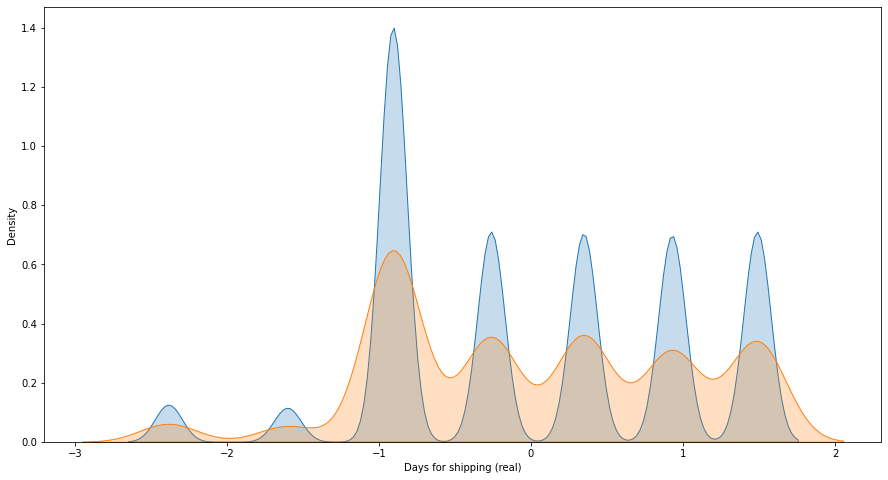

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


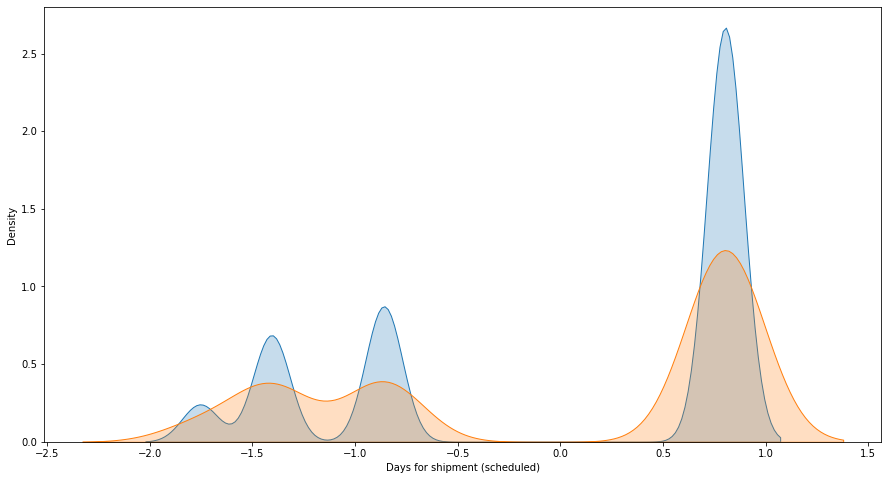

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


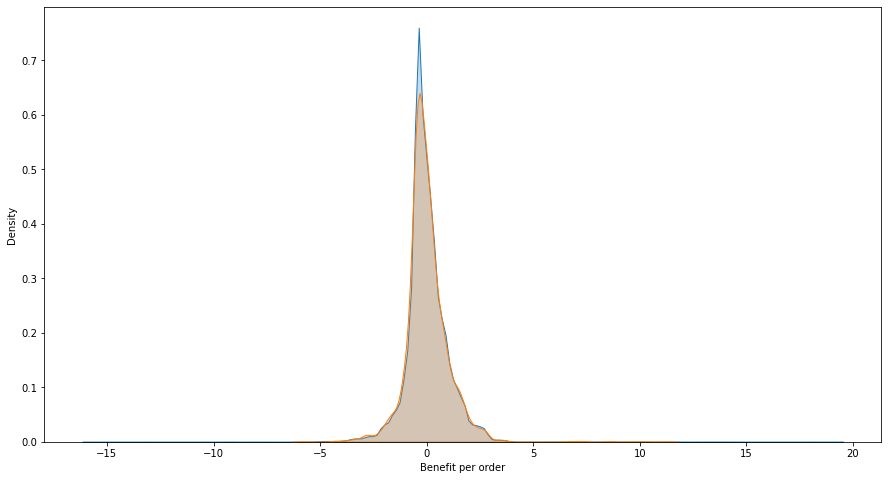

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


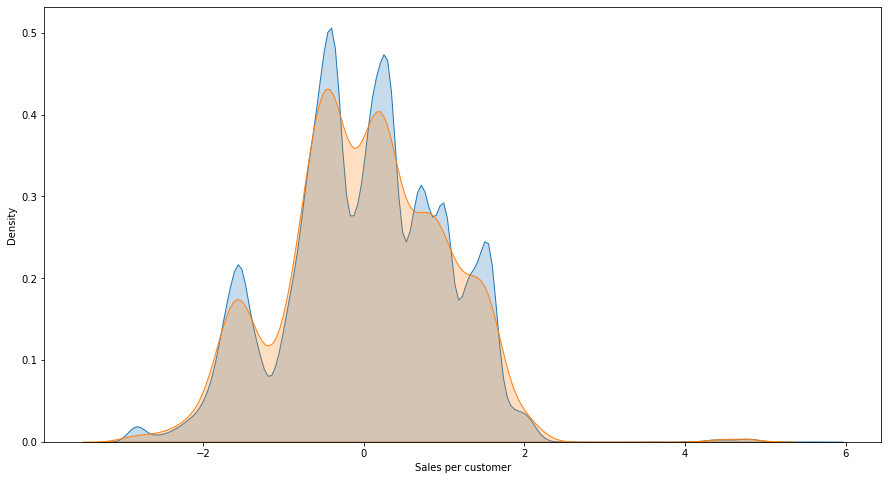

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


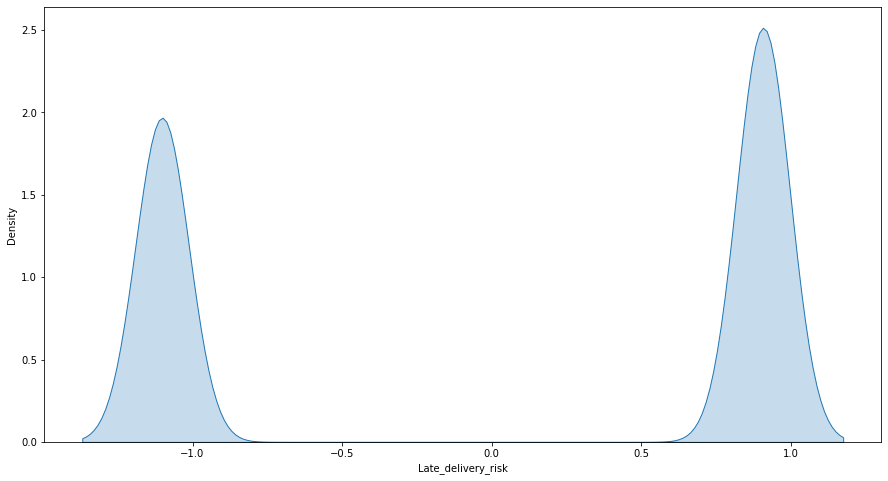

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


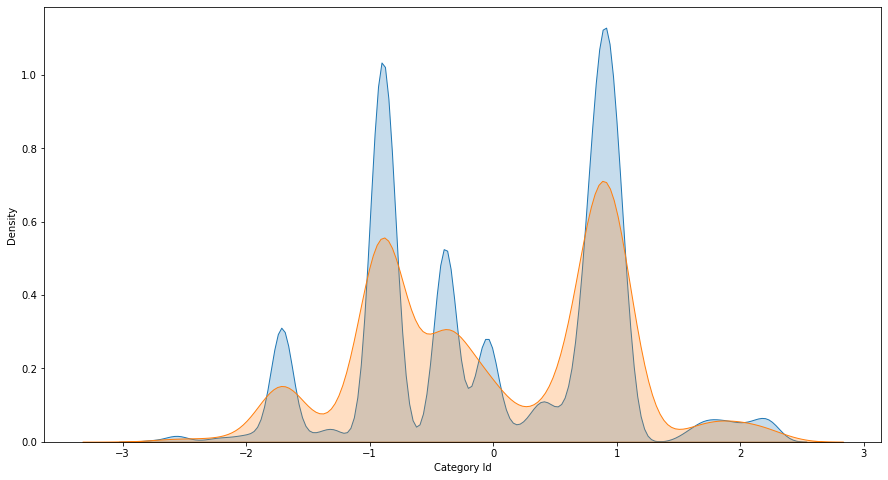

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


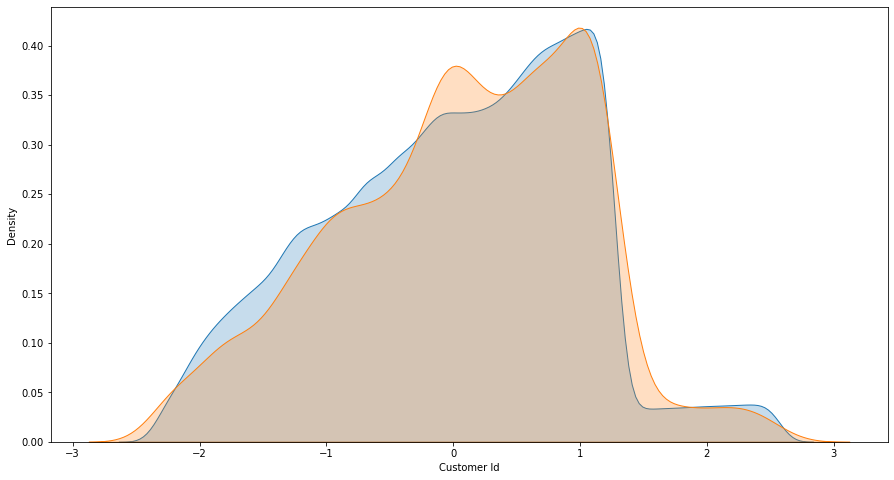

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


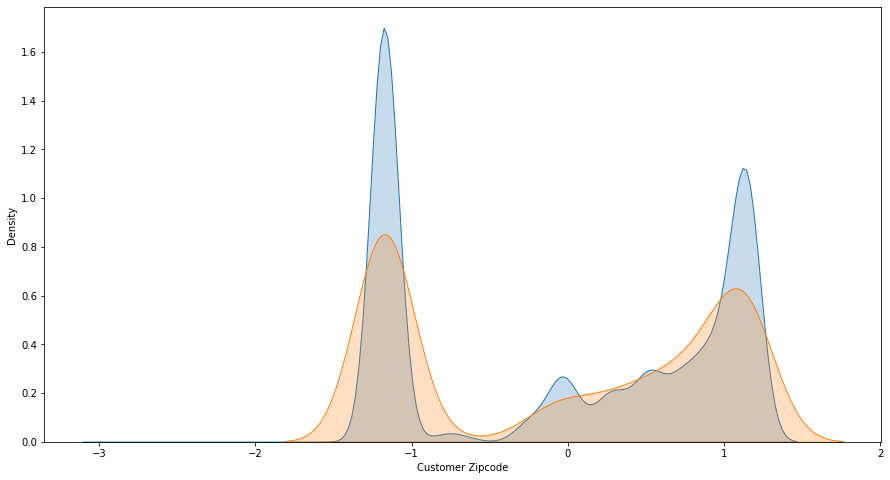

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


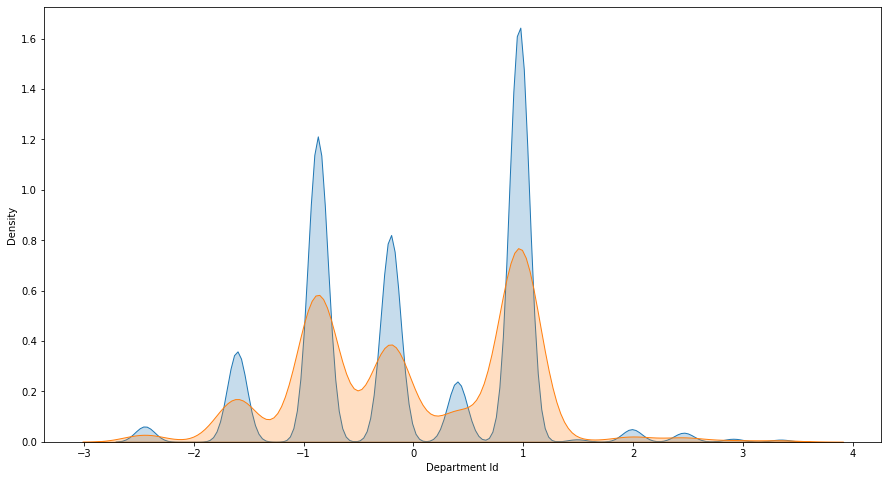

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


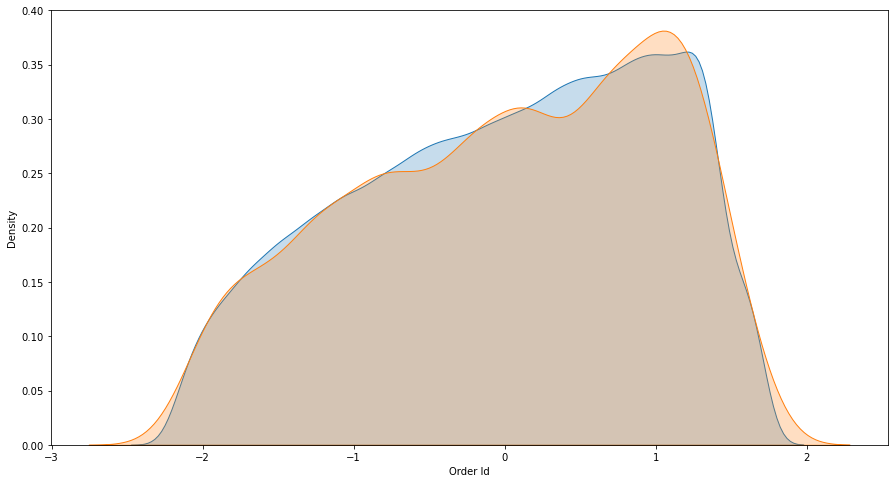

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


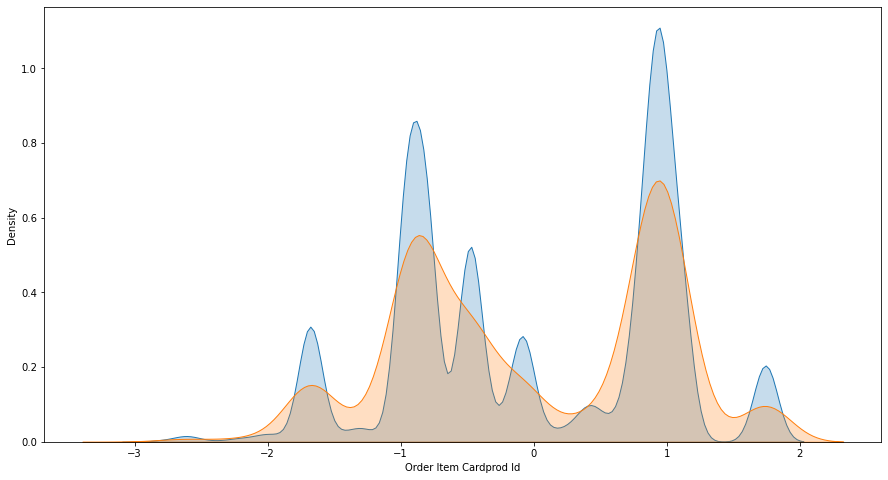

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


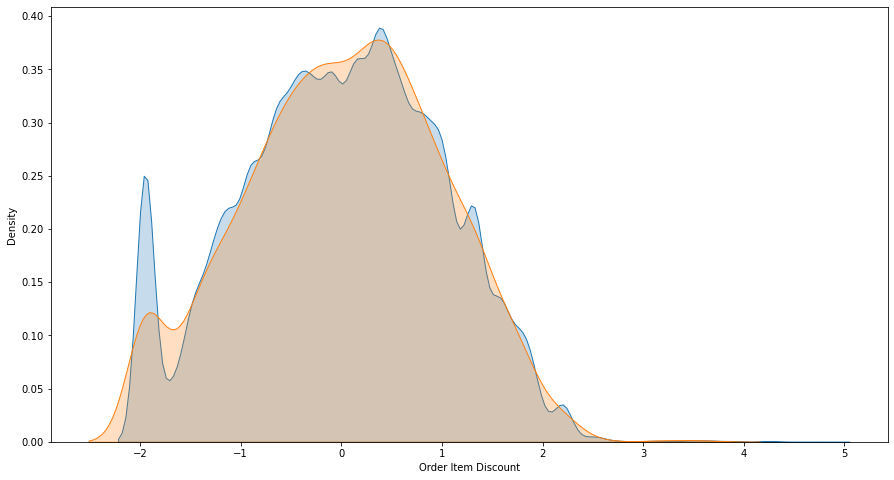

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


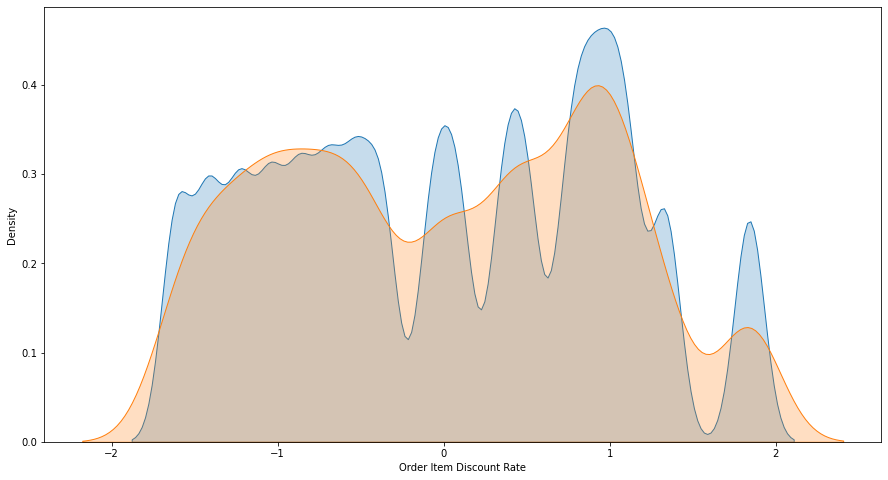

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


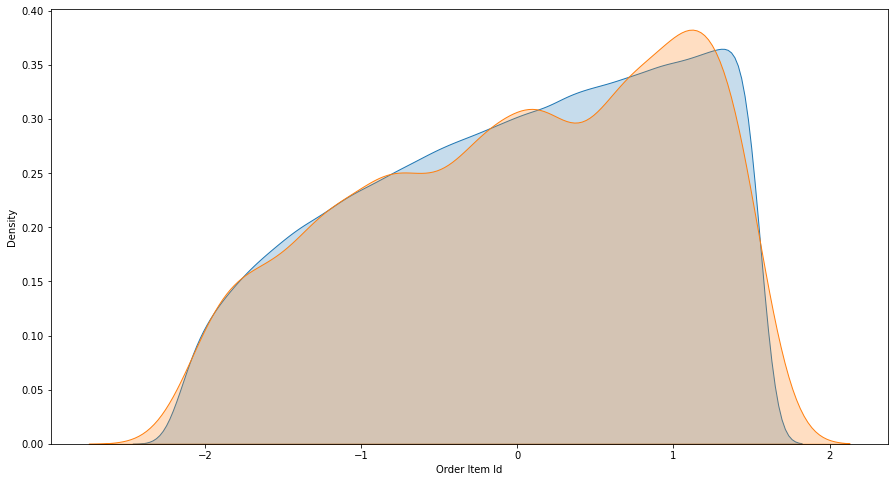

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


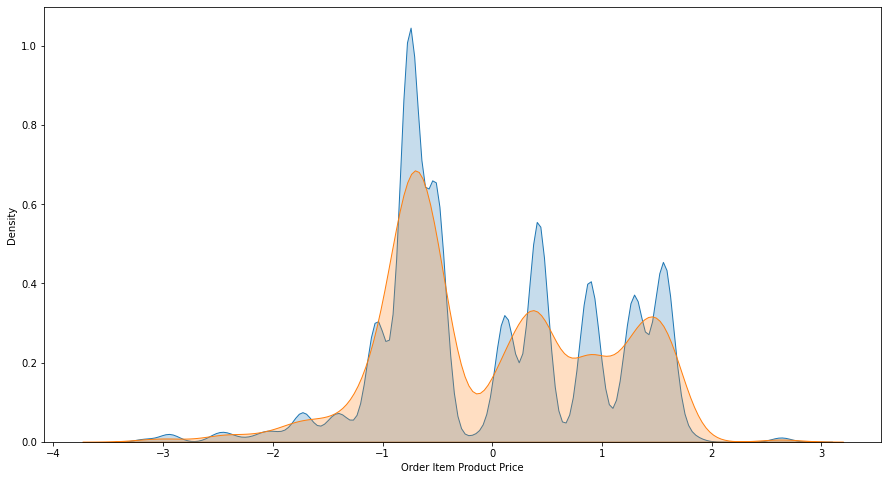

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


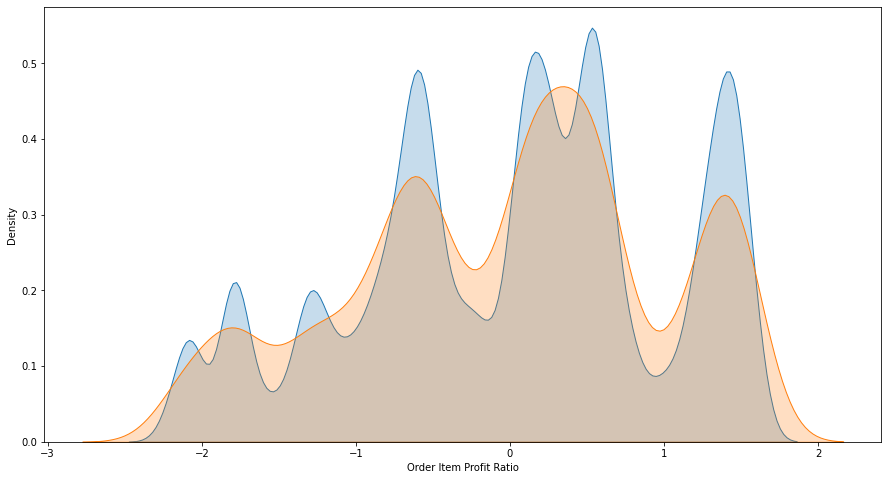

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


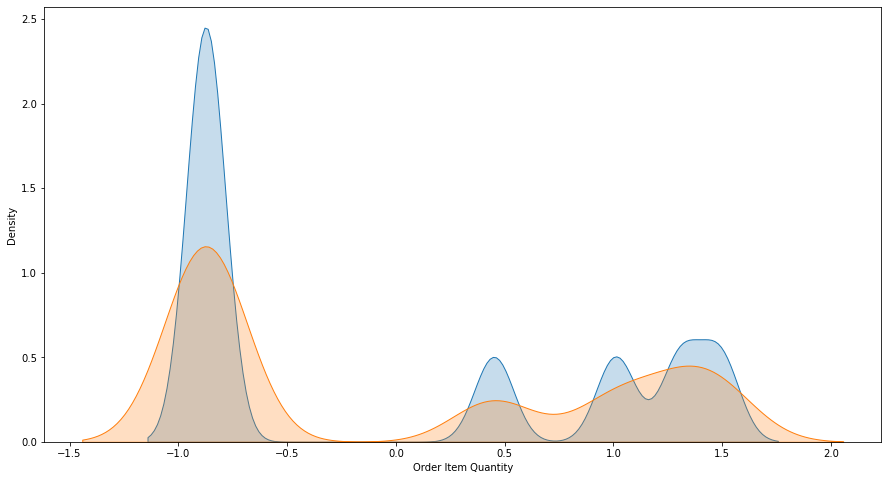

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


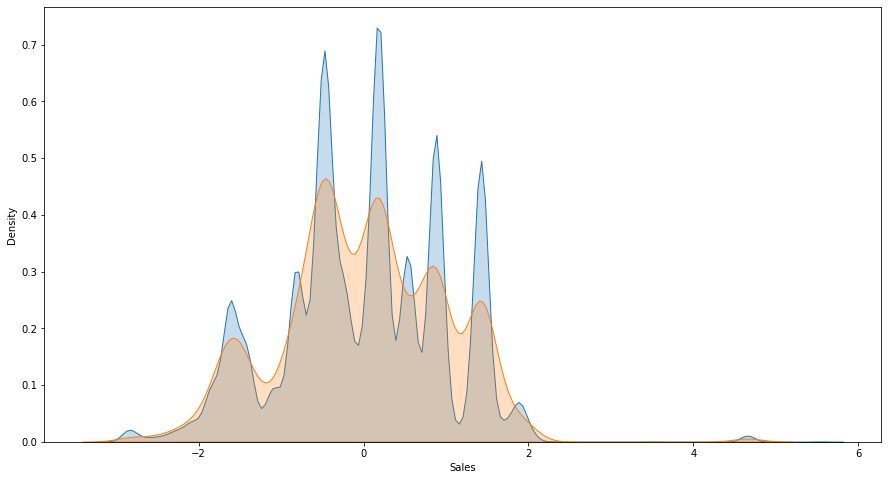

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


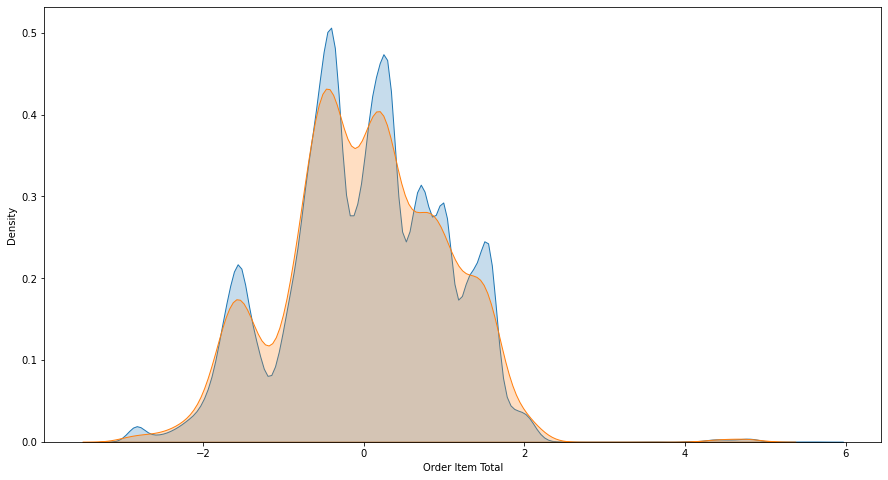

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


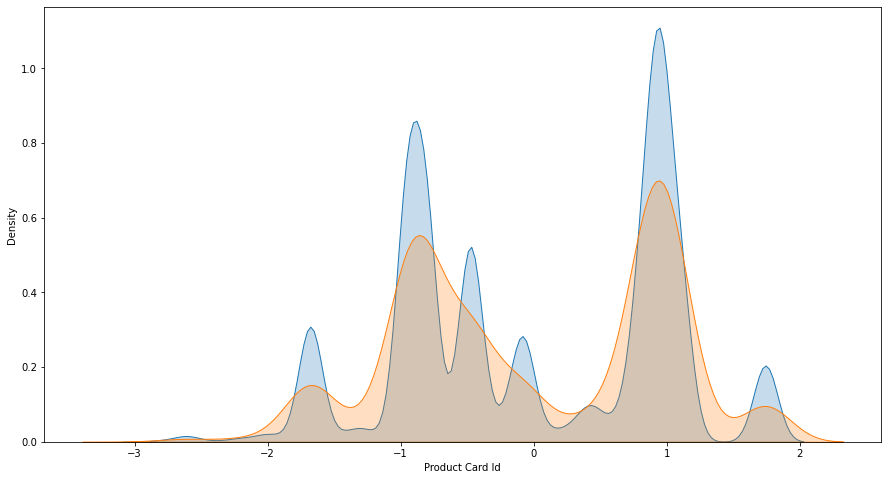

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


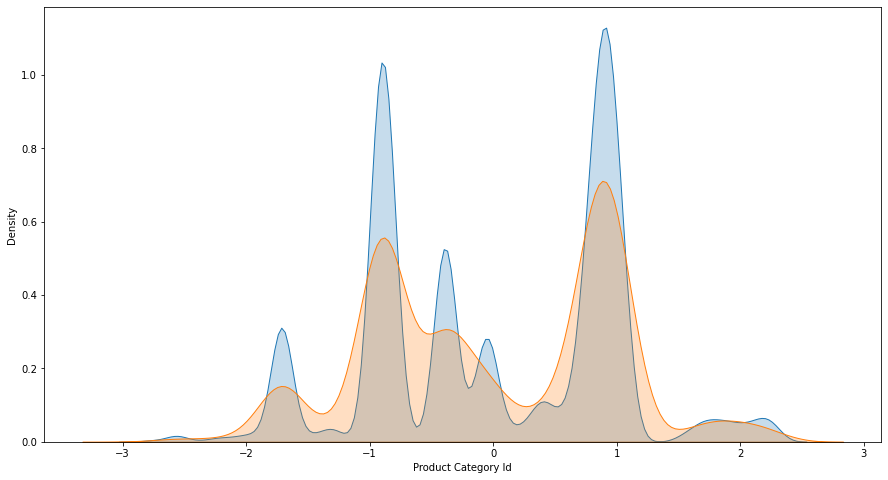

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


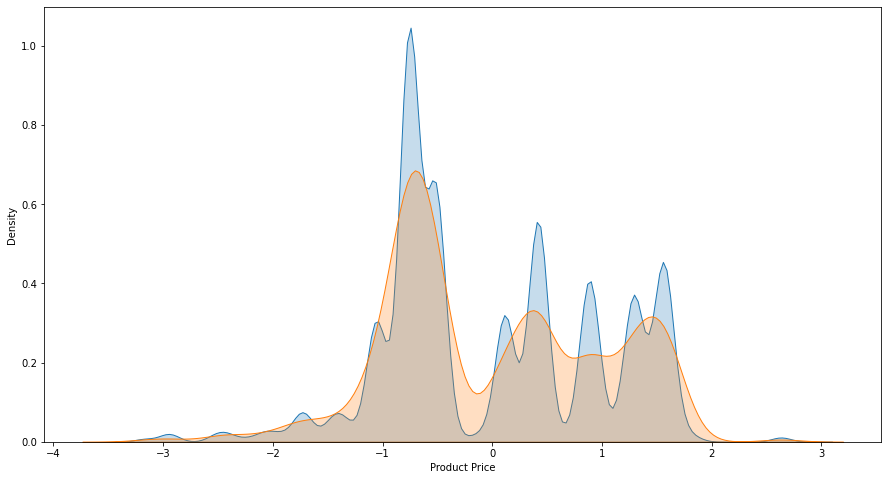

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(

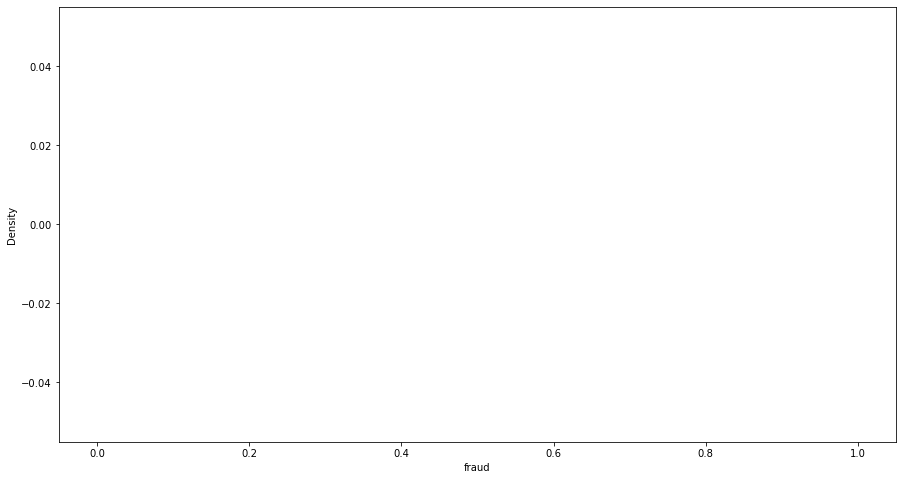

In [228]:
for i in num_cols_new:
    sns.distplot(df_new[df_new['fraud']==0][i],kde_kws={'shade':True},hist=False) # df_new -- DataFrame used for base model
    sns.distplot(df_new[df_new['fraud']==1][i],kde_kws={'shade':True},hist=False)
    plt.show()

In [ ]:
# Here, our modelling worked well.
# All the numeric columns that were left/used as features of final model are very well able to dintinguish target classes.

In [ ]:
# We made many changes from the base model that improved our model performance like SMOTE Analysis for Class Imbalance.